In [1]:
from google.oauth2 import service_account
from google.cloud import bigquery

In [2]:
credentials = service_account.Credentials.from_service_account_file("./bigquery.json")

In [4]:
client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

In [6]:
sql = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.cctv_location`"

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
import numpy as np
import pandas as pd
import seaborn as sns

## 폭력건수가 많은 지역

## 폭력건수가 많은 달

In [9]:
violence_month = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.violence_month`"
violence_month_df = client.query(violence_month).to_dataframe()
violence_month_df["월"] = violence_month_df["구분"].str.replace("월", "").astype(int)
violence_month_df_sort = violence_month_df.sort_values("월", ascending=True)

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


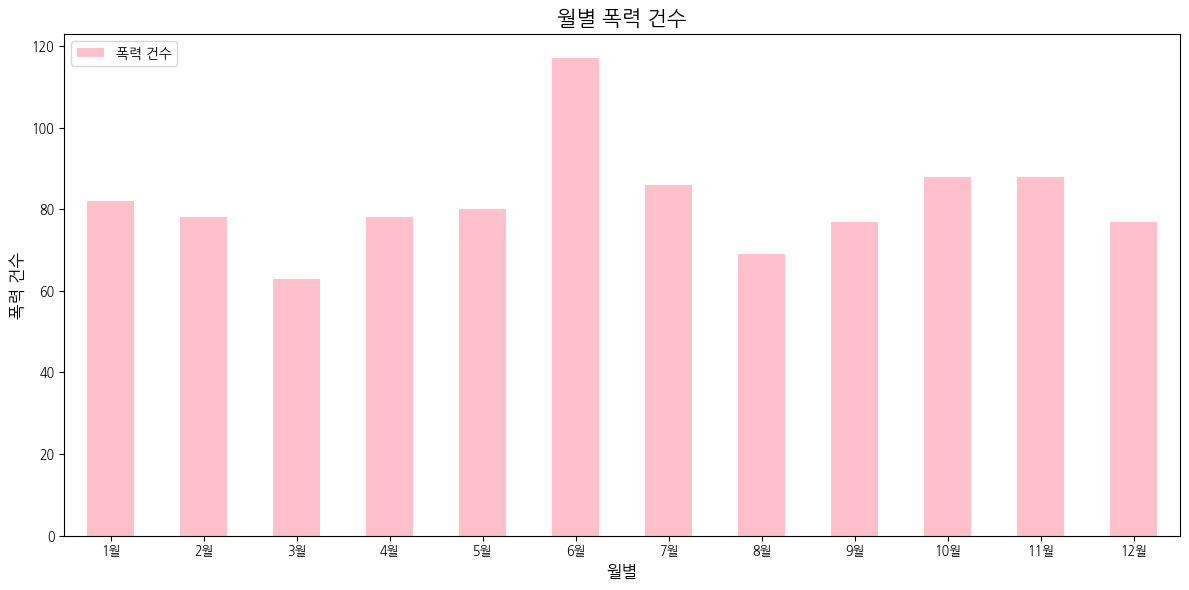

In [10]:
violence_month_df = violence_month_df_sort.set_index("구분")["소계"]
violence_month_df.plot(kind="bar", figsize=(12,6), color="pink")

# 플롯 설정
plt.title("월별 폭력 건수", fontsize=15)
plt.xlabel("월별", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)
plt.legend(["폭력 건수"], loc="upper left")
plt.tight_layout()
plt.savefig("./월별 폭력 건수.png", format="png")

## 폭력건수가 많은 요일

In [10]:
violence_week = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.violence_week`"
violence_week_df = client.query(violence_week).to_dataframe()
# violence_week_df

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


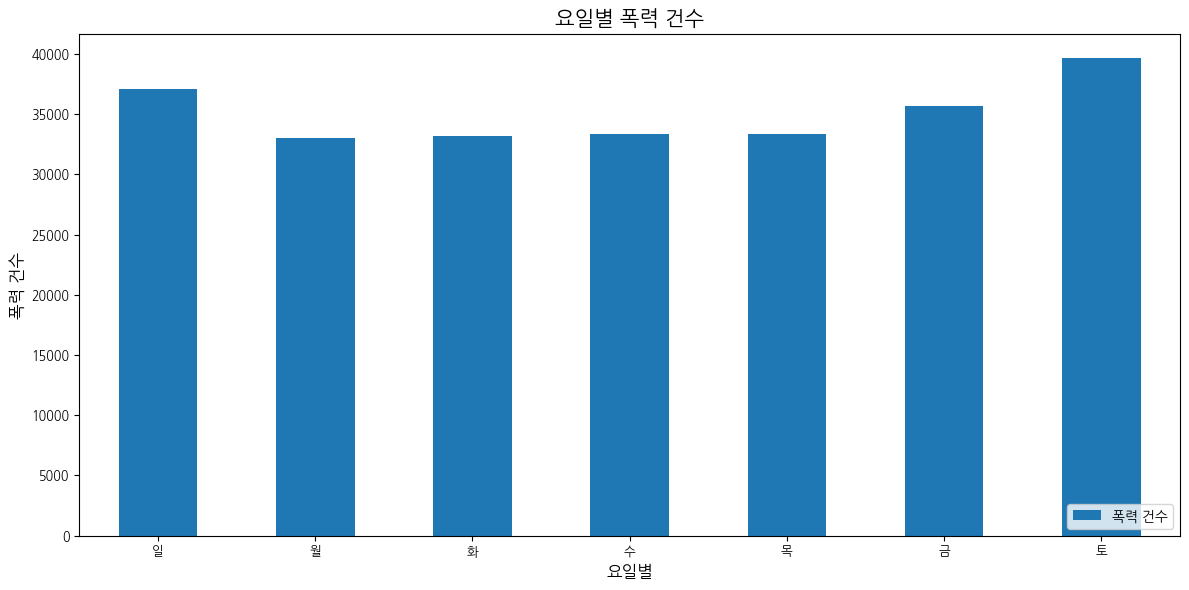

In [12]:
violence_week_df.set_index("구분")["소계"].plot(kind="bar",figsize=(12,6))

plt.title("요일별 폭력 건수", fontsize=15)
plt.xlabel("요일별", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
_= plt.xticks(rotation=0, fontsize=9)
_= plt.yticks(fontsize=9)
_= plt.legend(["폭력 건수"],loc="lower right")
plt.tight_layout()
plt.savefig("./요일별 폭력 건수.png", format="png")

## 폭력 당한 시간대

In [11]:
violence_time = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.violence_time`"
violence_time_df = client.query(violence_time).to_dataframe()
# violence_time_df

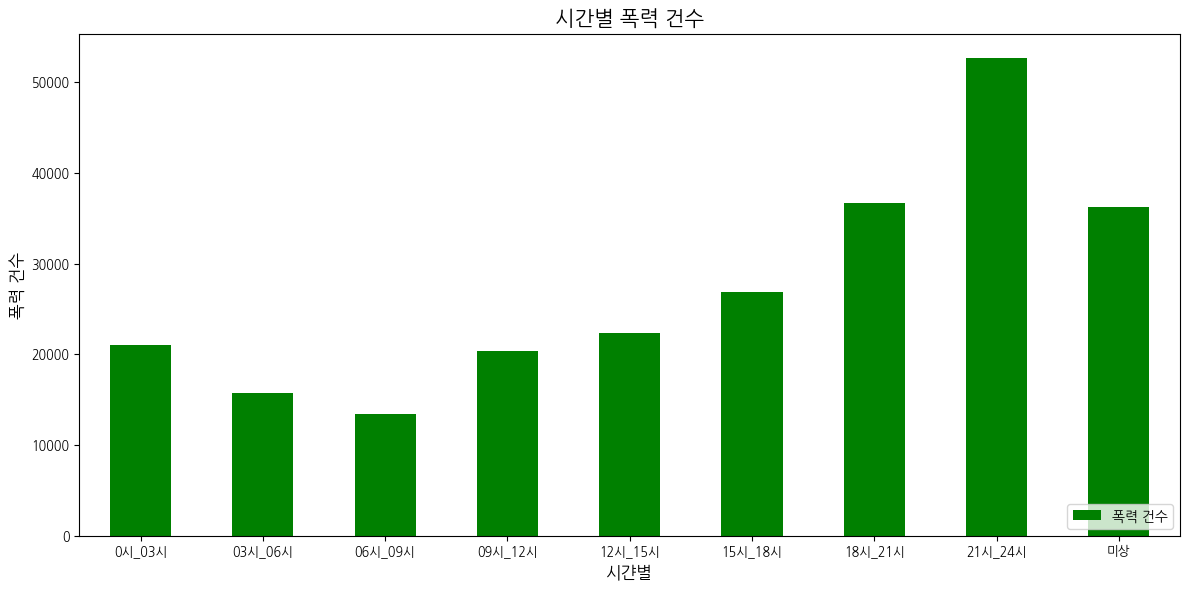

In [14]:
violence_time_df.set_index("구분")["소계"].plot(kind="bar",figsize=(12,6), color="green")

plt.title("시간별 폭력 건수", fontsize=15)
plt.xlabel("시갼별", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
_= plt.xticks(rotation=0, fontsize=9)
_= plt.yticks(fontsize=9)
_= plt.legend(["폭력 건수"],loc="lower right")
plt.tight_layout()
plt.savefig("./시간별 폭력 건수.png", format="png")

## 폭력당한 장소

In [12]:
violence_address = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.violence_address`"
violence_address = client.query(violence_address).to_dataframe()
# violence_address
violence_address_sort = violence_address.sort_values("소계", ascending=False)

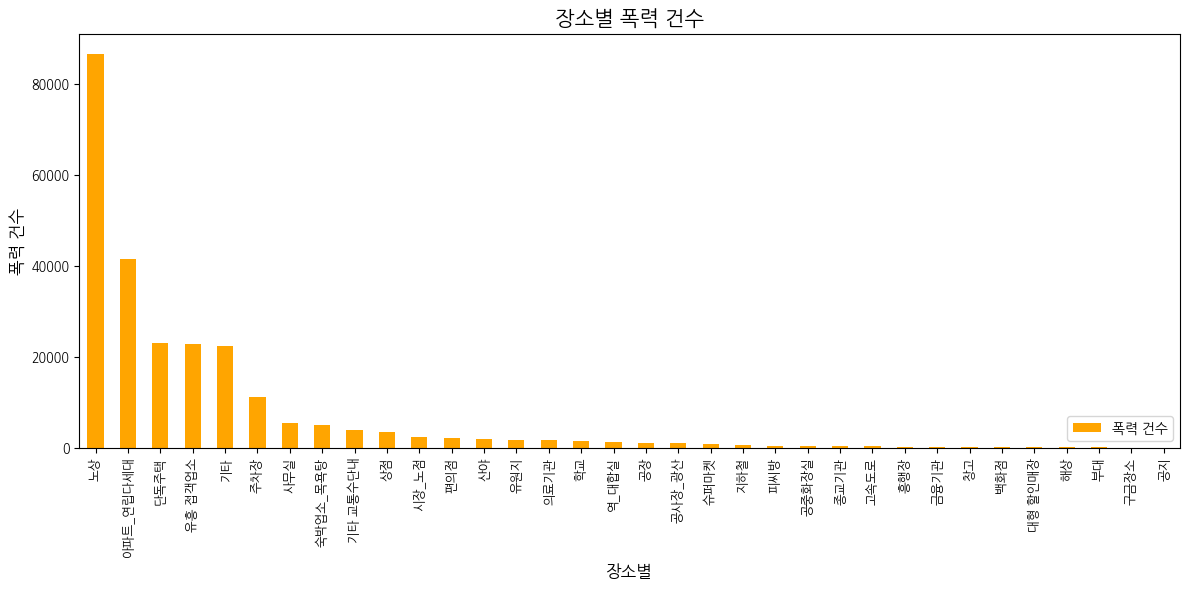

In [16]:
violence_address_sort.set_index("구분")["소계"].plot(kind="bar",figsize=(12,6), color="orange")

plt.title("장소별 폭력 건수", fontsize=15)
plt.xlabel("장소별", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
_= plt.xticks(rotation=90, fontsize=9)
_= plt.yticks(fontsize=9)
_= plt.legend(["폭력 건수"],loc="lower right")
plt.tight_layout()
plt.savefig("./장소별 폭력 건수.png", format="png")

## 피해자 남자 연령대

In [13]:
violence_victim_man_age = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.violence_victim_man_age`"
violence_victim_man_age_df = client.query(violence_victim_man_age).to_dataframe()
violence_victim_man_age_df_sort = violence_victim_man_age_df.sort_values("번호")

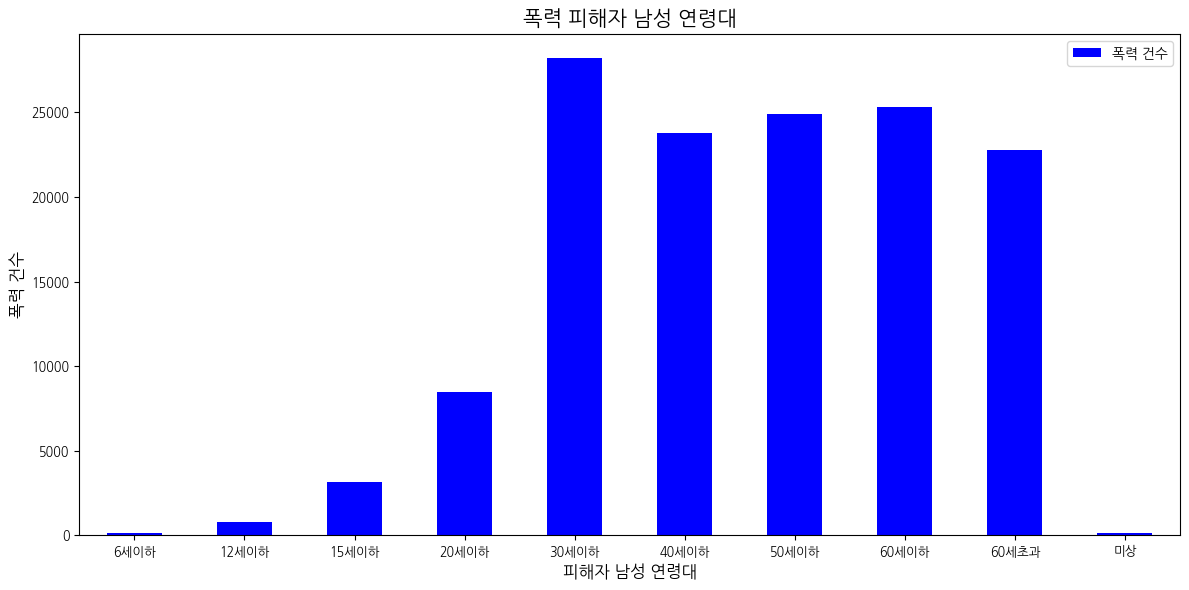

In [18]:
# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
violence_victim_man_age_df_sort.set_index("구분")["소계"].plot(kind="bar",figsize=(12,6), color="blue")

plt.title("폭력 피해자 남성 연령대", fontsize=15)
plt.xlabel("피해자 남성 연령대", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)
plt.legend(["폭력 건수"], loc="upper right")
plt.tight_layout()
plt.savefig("./폭력 피해자 남성 연령대.png", format="png")

## 피해자 여자 연령대

In [14]:
violence_victim_woman_age = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.violence_victim_woman_age`"
violence_victim_woman_age_df = client.query(violence_victim_woman_age).to_dataframe()
violence_victim_woman_age_df_sort = violence_victim_woman_age_df.sort_values("번호")

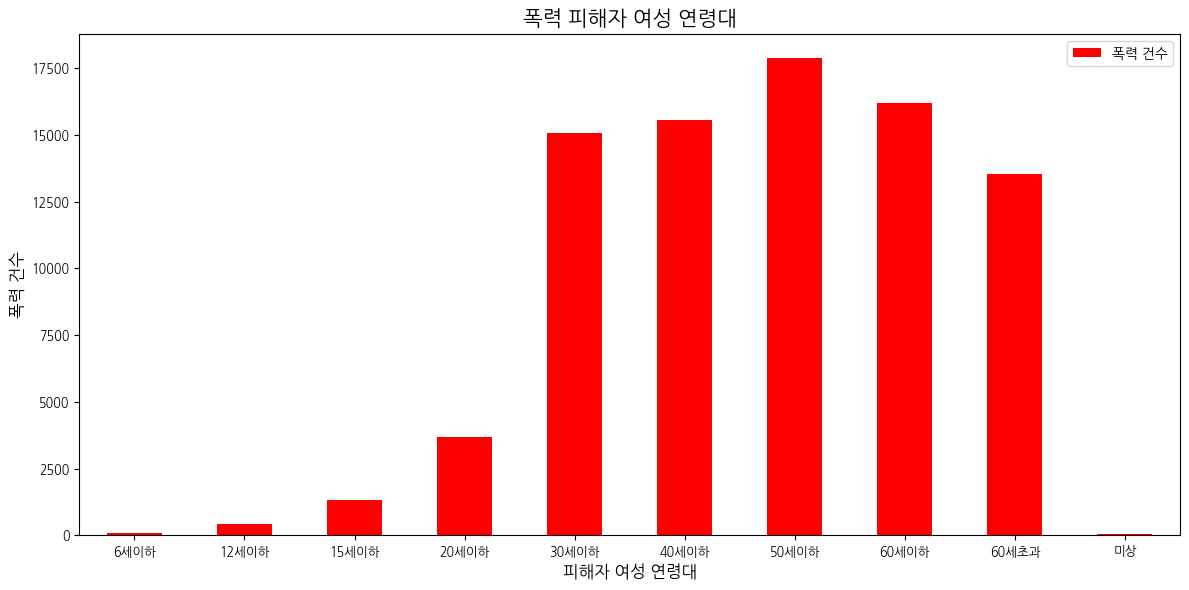

In [20]:
# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
violence_victim_woman_age_df_sort.set_index("구분")["소계"].plot(kind="bar",figsize=(12,6), color="red")

plt.title("폭력 피해자 여성 연령대", fontsize=15)
plt.xlabel("피해자 여성 연령대", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)
plt.legend(["폭력 건수"], loc="upper right")
plt.tight_layout()
plt.savefig("./폭력 피해자 여성 연령대.png", format="png")

## 피해자 연령대 (남자 + 여자)

In [15]:
violence_victim_age = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.violence_victim_age`"
violence_victim_age_df = client.query(violence_victim_age).to_dataframe()
violence_victim_age_df_sort = violence_victim_age_df.sort_values("번호")

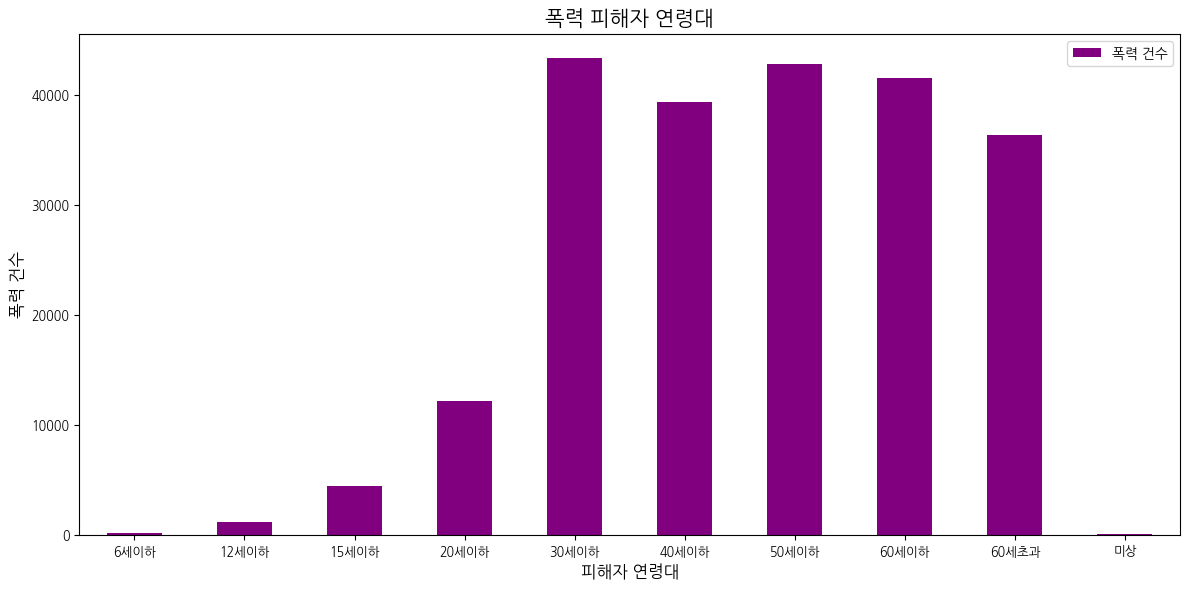

In [22]:
# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
violence_victim_age_df_sort.set_index("구분")["소계"].plot(kind="bar",figsize=(12,6), color="purple")

plt.title("폭력 피해자 연령대", fontsize=15)
plt.xlabel("피해자 연령대", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)
plt.legend(["폭력 건수"], loc="upper right")
plt.tight_layout()
plt.savefig("./폭력 피해자 연령대.png", format="png")

## 범죄자 연령대

In [16]:
crime_age = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.crime_age`"
crime_age_df = client.query(crime_age).to_dataframe()
crime_age_sort = crime_age_df.sort_values("번호")

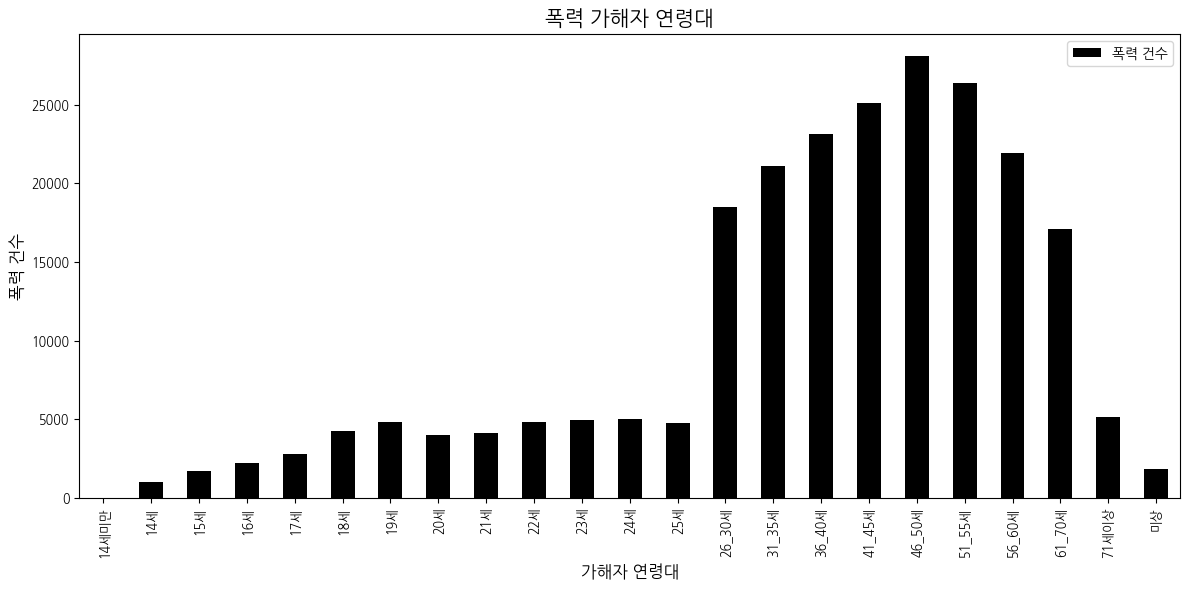

In [24]:
# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
crime_age_sort.set_index("구분")["소계"].plot(kind="bar",figsize=(12,6), color="black")

plt.title("폭력 가해자 연령대", fontsize=15)
plt.xlabel("가해자 연령대", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.legend(["폭력 건수"], loc="upper right")
plt.tight_layout()
plt.savefig("./폭력 기해자 연령대.png", format="png")

## 폭력 범죄자 여성 남성

In [17]:
crime_man_woman = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.crime_man_woman`"
crime_man_woman_df = client.query(crime_man_woman).to_dataframe()
crime_man_woman_df_sort = crime_man_woman_df.sort_values(by="폭력", ascending=False)

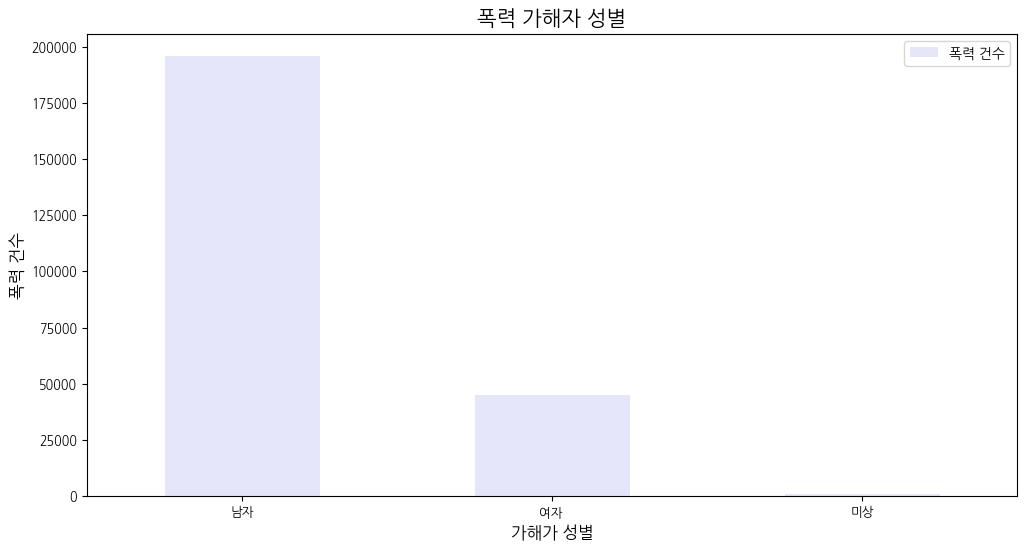

In [26]:
# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
crime_man_woman_df_sort.set_index("구분")["폭력"].plot(kind="bar",figsize=(12,6), color="lavender")

plt.title("폭력 가해자 성별", fontsize=15)
plt.xlabel("가해가 성별", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)
plt.legend(["폭력 건수"], loc="upper right")
plt.savefig("./폭력 가해자 성별.png", format="png")

### 구별 CCTV 개수

In [18]:
cctv_count = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.cctv_location`"
cctv_count_df = client.query(cctv_count).to_dataframe()
cctv_count_sum = cctv_count_df.groupby("자치구명")["CCTV 수량"].sum()
cctv_count_sum_sort = cctv_count_sum.sort_values(ascending=False)

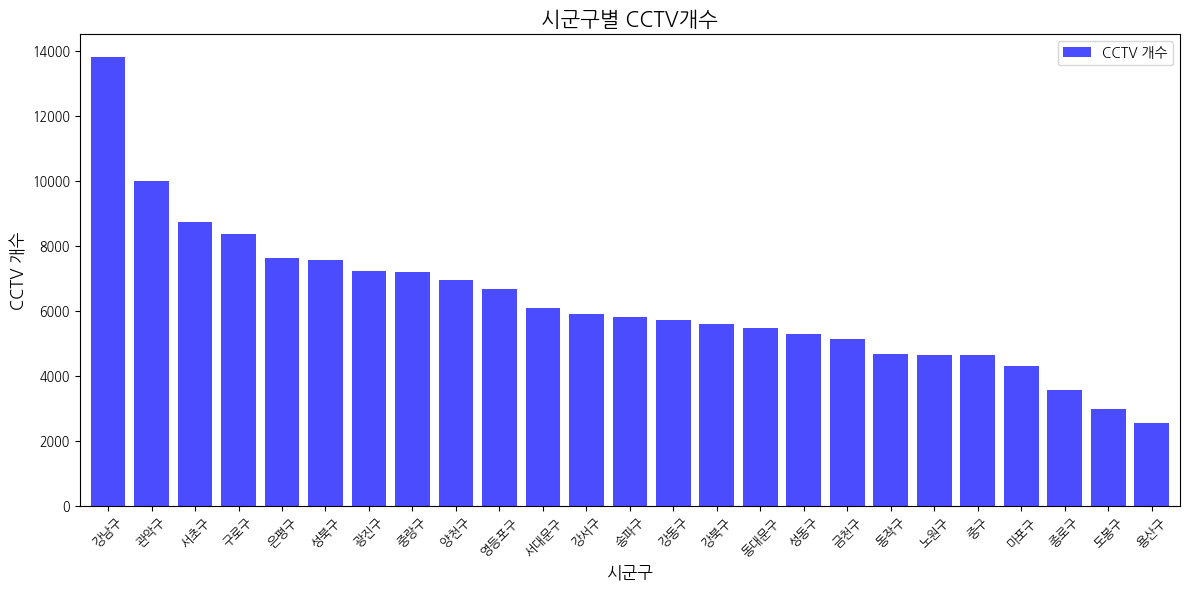

In [28]:
# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
cctv_count_sum_sort.plot(kind="bar",figsize=(12,6), color="blue", alpha=0.7, width=0.8)

plt.title("시군구별 CCTV개수", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("CCTV 개수", fontsize=12)
plt.yticks(fontsize=9)
plt.xticks(rotation=45, fontsize=9)
plt.legend(["CCTV 개수"], loc="upper right")
plt.tight_layout()
plt.savefig("./시군구별 CCTV 개수.png", format="png")

##  구별 주택 수 정보

In [19]:
house_type = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.house_type`"
house_type_df = client.query(house_type).to_dataframe()
house_type_df = house_type_df[house_type_df['동별'] != '소계']
# house_type_df = house_type_df.drop(columns="소계")
house_type_sum = house_type_df.groupby('동별').sum().reset_index()
house_type_sum_sort = house_type_sum.sort_values(by="소계", ascending=False)

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


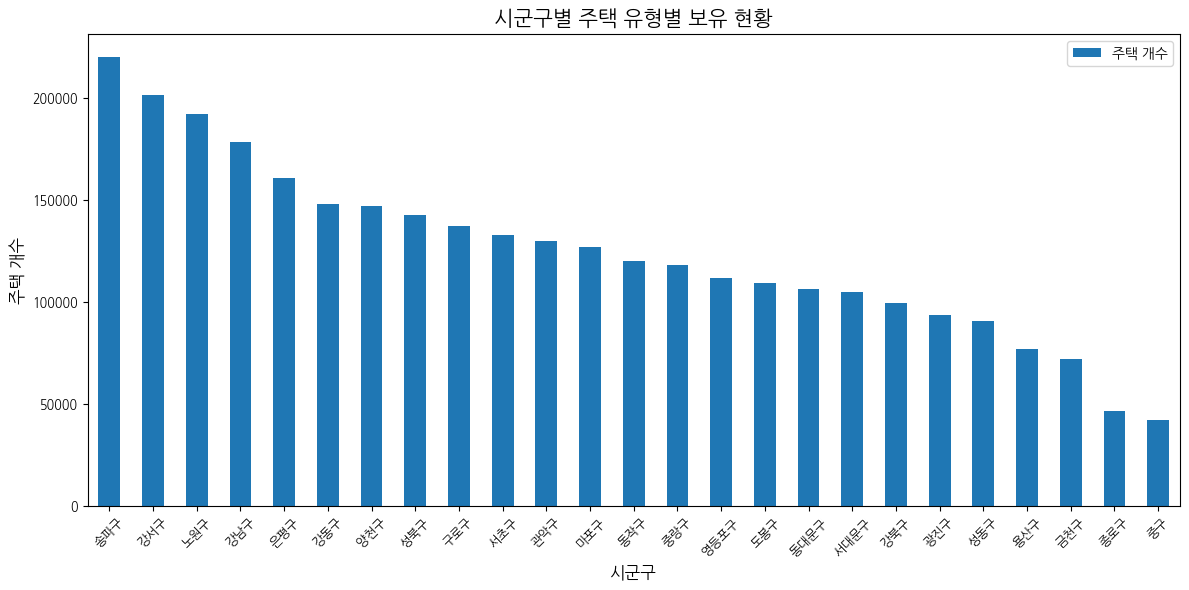

In [30]:
# x 축에 동 이름 설정
x = house_type_sum_sort['동별']

# 각 주택 유형별 막대 그래프 그리기
categories = house_type_sum_sort.columns[2]  # 주택 유형 카테고리 (일반단독주택부터 비거주용건물내주택까지)
# categories
# # plot() 메서드를 사용하여 그래프 그리기
house_type_sum_sort.plot(kind='bar', x='동별', figsize=(12, 6), fontsize=12, y = categories)

plt.title("시군구별 주택 유형별 보유 현황", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("주택 개수", fontsize=12)
plt.legend(["주택 개수"],loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./시군구별 주택 유형별 보유 현황.png", format="png")

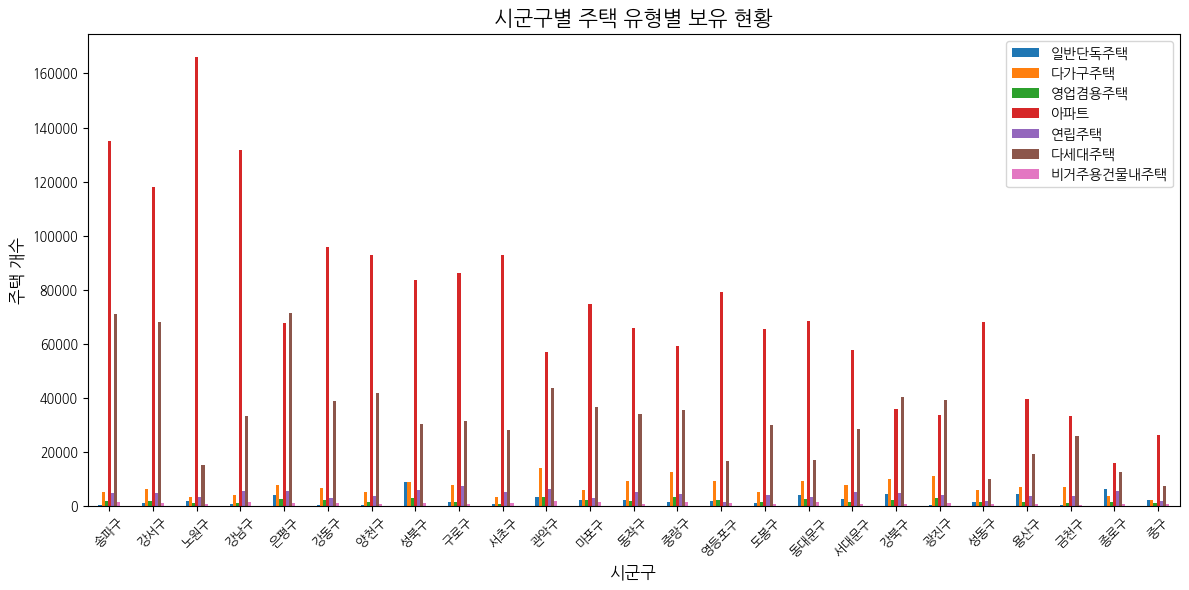

In [31]:
house_type_sum = house_type_df.groupby('동별').sum().reset_index()
house_type_sum_sort = house_type_sum.sort_values(by="소계", ascending=False)

# x 축에 동 이름 설정
x = house_type_sum_sort['동별']

# 각 주택 유형별 막대 그래프 그리기
categories = house_type_sum_sort.columns[3:]  # 주택 유형 카테고리 (일반단독주택부터 비거주용건물내주택까지)
# categories
# # plot() 메서드를 사용하여 그래프 그리기
house_type_sum_sort.plot(kind='bar', x='동별', figsize=(12, 6), fontsize=12, y = categories)

plt.title("시군구별 주택 유형별 보유 현황", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("주택 개수", fontsize=12)
plt.legend(loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./시군구별 주택 유형별 보유 현황_따로.png", format="png")

### 경찰서 개수

In [22]:
police_address = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.police_address`"
police_address_df = client.query(police_address).to_dataframe()
police_address_df["번호"] = 1
# police_address_df
police_address_sum = police_address_df.groupby("시군구").sum().reset_index()
police_address_sum_sort = police_address_sum.sort_values(by="번호", ascending=False)

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


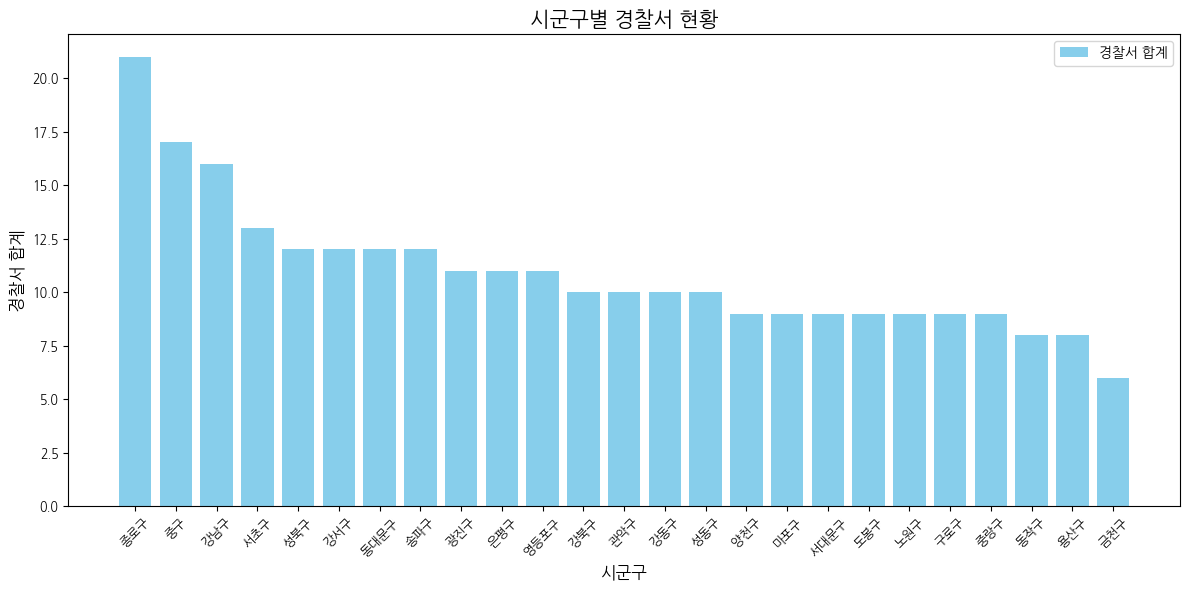

In [23]:
# x 축에 시군구 이름 설정
x = police_address_sum_sort["시군구"]

# 카테고리 설정 (번호 열만 선택)
categories = ["번호"]

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x, police_address_sum_sort["번호"], color='skyblue')

plt.title("시군구별 경찰서 현황", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("경찰서 합계", fontsize=12)
plt.legend(["경찰서 합계"], loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./시군구별 경찰서 현황.png", format="png")

## 가로등/비상벨 개수

In [24]:
emergencty_bell_location = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.emergencty_bell_location`"
emergencty_bell_location_df = client.query(emergencty_bell_location).to_dataframe()
emergencty_bell_location_df["번호"] = 1
# emergencty_bell_location_df
emergencty_bell_location_sum = emergencty_bell_location_df.groupby("시군구").sum().reset_index()
emergencty_bell_location_sum_sort = emergencty_bell_location_sum.sort_values(by="번호", ascending=False)

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


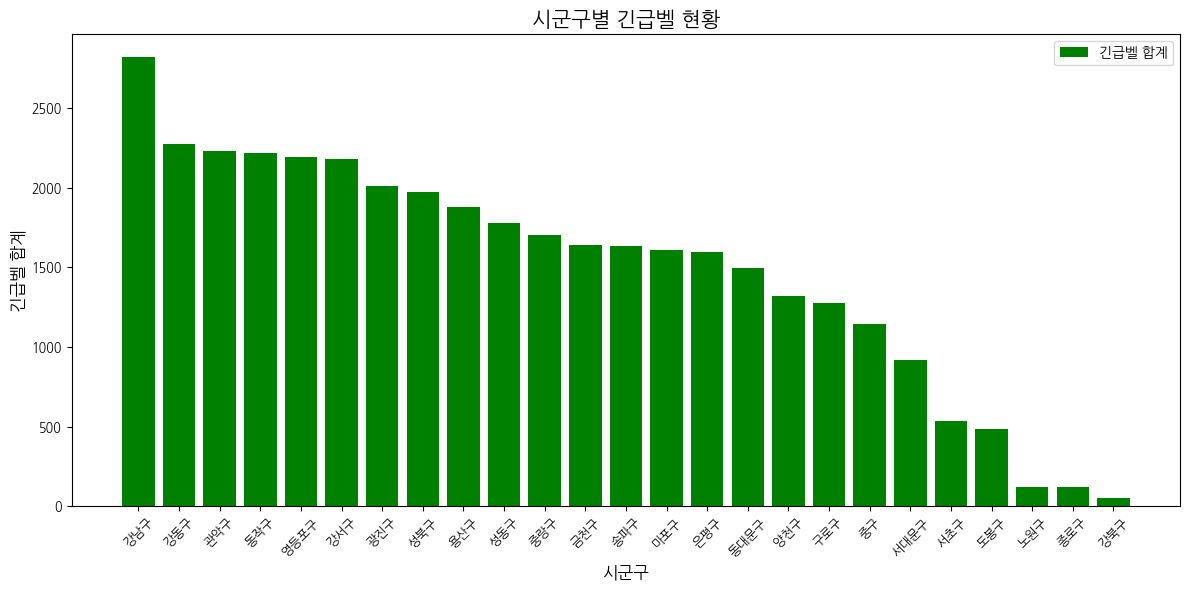

In [35]:
# x 축에 시군구 이름 설정
x = emergencty_bell_location_sum_sort["시군구"]

# 카테고리 설정 (번호 열만 선택)
categories = ["번호"]

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x, emergencty_bell_location_sum_sort["번호"], color='green')

plt.title("시군구별 긴급벨 현황", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("긴급벨 합계", fontsize=12)
plt.legend(["긴급벨 합계"], loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./시군구별 긴급벨 현황.png", format="png")

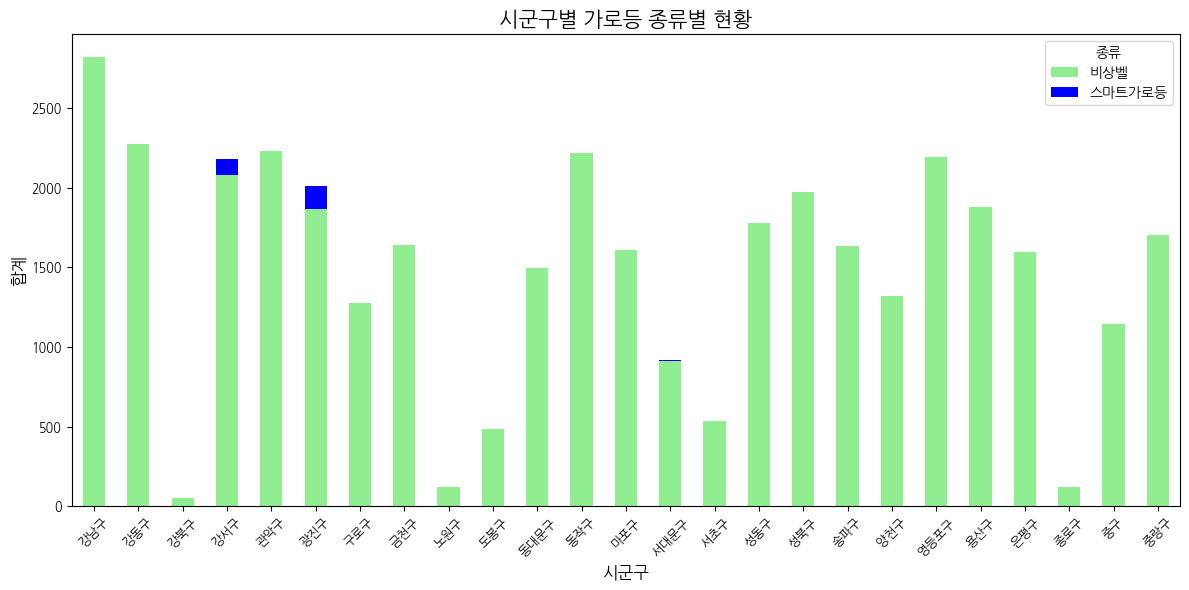

In [36]:
# 종류에 따라 종류_번호 열 생성
emergencty_bell_location_df["종류_번호"] = np.where(emergencty_bell_location_df["종류"] == "비상벨", 1, 2)

# 시군구 및 종류별 합계 계산
emergencty_bell_location_sum = emergencty_bell_location_df.groupby(["시군구", "종류"])["종류_번호"].count().reset_index(name="가로등 합계")

# 가로등 합계 기준으로 내림차순 정렬
emergencty_bell_location_sum = emergencty_bell_location_sum.sort_values(by="가로등 합계", ascending=False)

# 피벗 테이블로 변환하여 시각화 준비
pivot_df = emergencty_bell_location_sum.pivot_table(index="시군구", columns="종류", values="가로등 합계", fill_value=0)

# 시각화
pivot_df.plot(kind="bar", stacked=True, figsize=(12, 6), color=["lightgreen", "blue"])

plt.title("시군구별 가로등 종류별 현황", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("합계", fontsize=12)
plt.legend(title="종류", loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./시군구별 가로등 종류별 현황.png", format="png")

## 도로의 가로등 개수

In [25]:
street_lamp_location   = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.street_lamp_location`"
street_lamp_location_df   = client.query(street_lamp_location).to_dataframe()
street_lamp_location_df["번호"] = 1
# street_lamp_location_df  
street_lamp_location_df_sum = street_lamp_location_df.groupby("시군구").sum().reset_index()
street_lamp_location_df_sum_sort = street_lamp_location_df_sum.sort_values(by="번호", ascending=False)

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


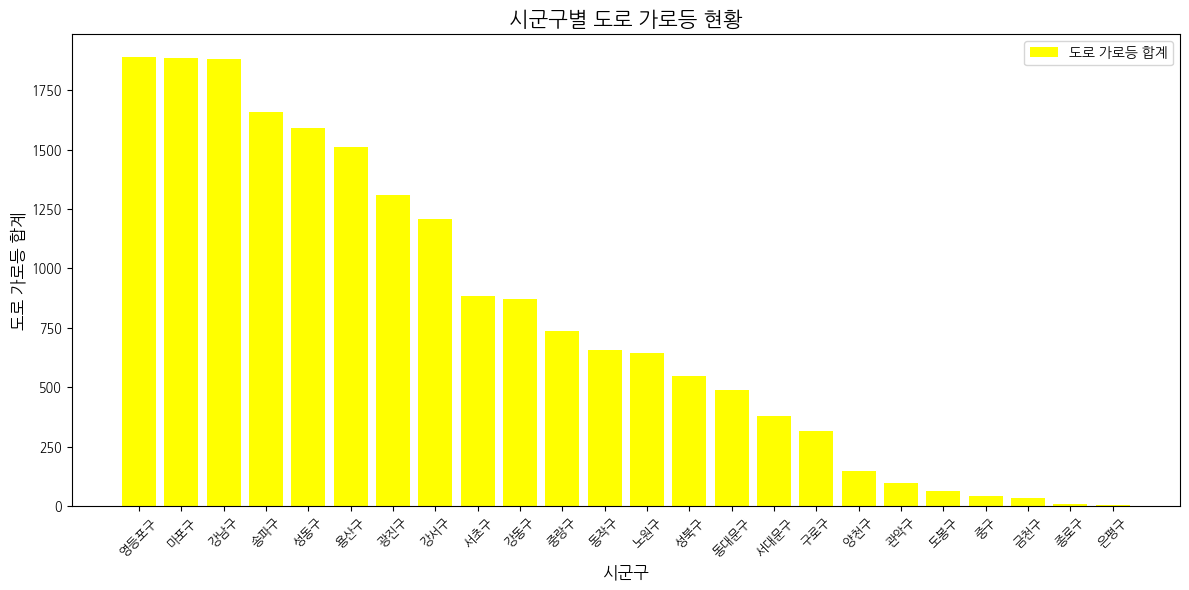

In [38]:
# x 축에 시군구 이름 설정
x = street_lamp_location_df_sum_sort["시군구"]

# 카테고리 설정 (번호 열만 선택)
categories = ["번호"]

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x, street_lamp_location_df_sum_sort["번호"], color='yellow')

plt.title("시군구별 도로 가로등 현황", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("도로 가로등 합계", fontsize=12)
plt.legend(["도로 가로등 합계"], loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./시군구별 도로 가로등 현황.png", format="png")

### 녹지현황

In [26]:
green_space   = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.green_space`"
green_space_df   = client.query(green_space).to_dataframe()
# green_space_df 
green_space_df_sum = green_space_df .groupby('시군구').sum().reset_index()
green_space_df_sum_sort = green_space_df.sort_values(by="합계 개소", ascending=False)

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


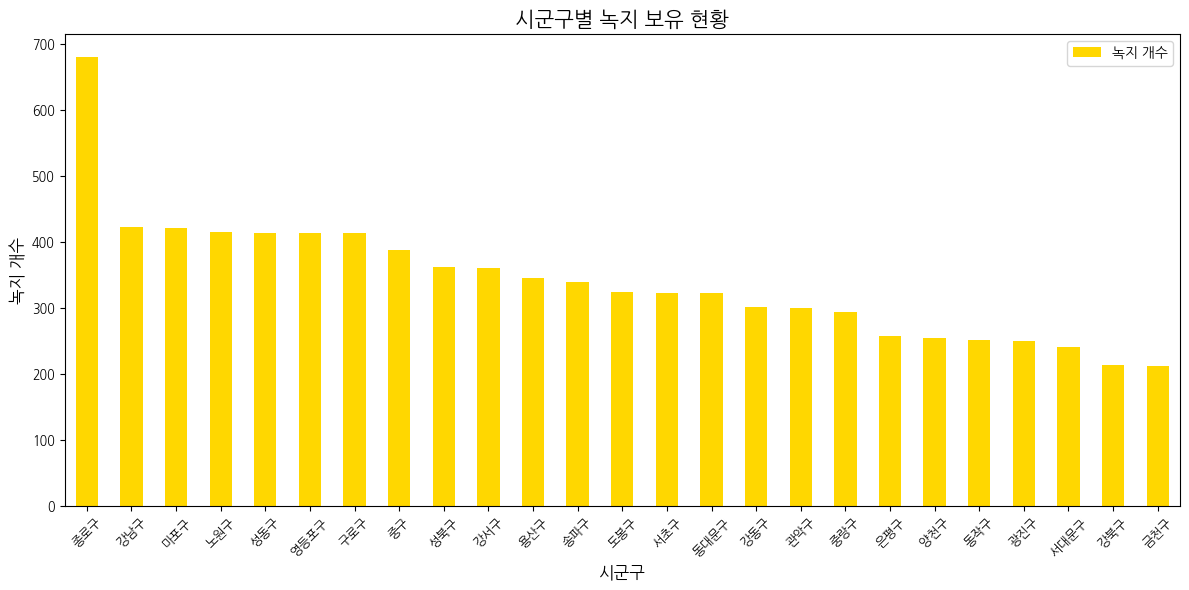

In [40]:
# x 축에 동 이름 설정
x = green_space_df_sum_sort['시군구']

# 각 주택 유형별 막대 그래프 그리기
categories = green_space_df_sum_sort.columns[1]
# categories
# # plot() 메서드를 사용하여 그래프 그리기
green_space_df_sum_sort.plot(kind='bar', x='시군구', figsize=(12, 6), fontsize=12, y = categories, color="gold")

plt.title("시군구별 녹지 보유 현황", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("녹지 개수", fontsize=12)
plt.legend(["녹지 개수"], loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./시군구별 녹지 보유 현황.png", format="png")

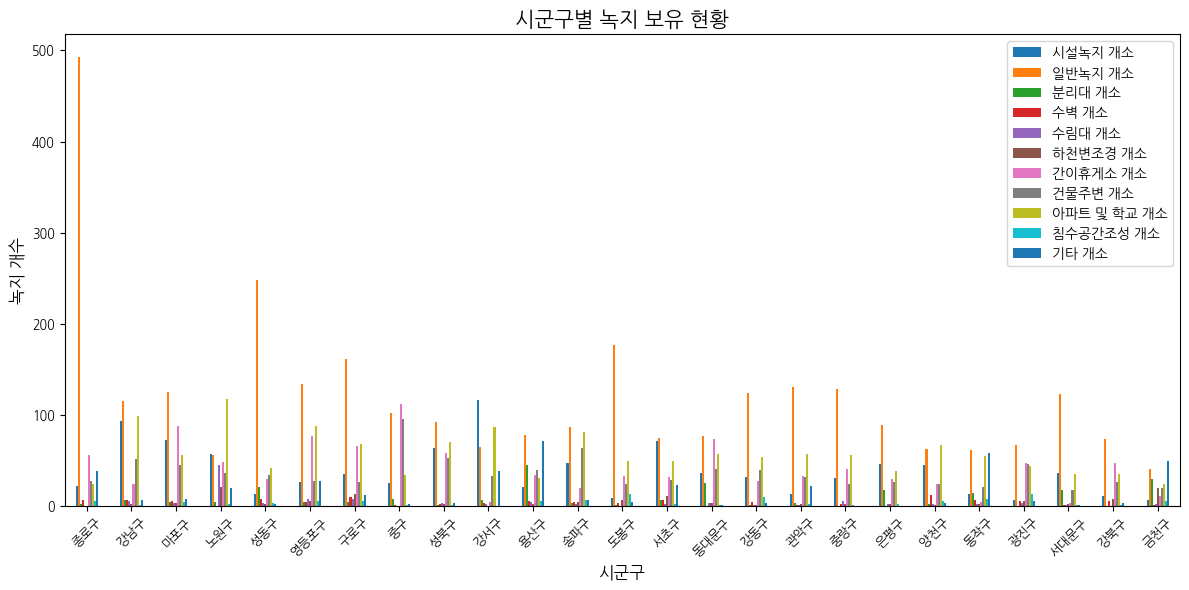

In [41]:
green_space_df_sum = green_space_df .groupby('시군구').sum().reset_index()
green_space_df_sum_sort = green_space_df.sort_values(by="합계 개소", ascending=False)

# x 축에 동 이름 설정
x = green_space_df_sum_sort['시군구']

# 각 주택 유형별 막대 그래프 그리기
categories = ["시설녹지 개소", "일반녹지 개소", "분리대 개소", "수벽 개소", "수림대 개소", "하천변조경 개소",
              "간이휴게소 개소", "건물주변 개소", "아파트 및 학교 개소", "침수공간조성 개소", "기타 개소"]
# categories
# # plot() 메서드를 사용하여 그래프 그리기
green_space_df_sum_sort.plot(kind='bar', x='시군구', figsize=(12, 6), fontsize=12, y = categories)

plt.title("시군구별 녹지 보유 현황", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("녹지 개수", fontsize=12)
plt.legend(loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./시군구별 녹지 보유 현황_따로.png", format="png")

## 시군구별 폭력건수

In [29]:
violence_city = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.Crime_Data`"
violence_city_df = client.query(violence_city).to_dataframe()
# violence_city_df 
violence_city_df["합계"] = violence_city_df["폭력발생"] + violence_city_df["폭력검거"]
violence_city_df = violence_city_df[violence_city_df['자치구별_2_'] != '소계']
violence_city_df = violence_city_df[["자치구별_2_","합계", "폭력발생", "폭력검거"]]
violence_city_df_sum = violence_city_df.groupby('자치구별_2_').sum().reset_index()
violence_city_df_sum_sort = violence_city_df_sum.sort_values(by="합계", ascending=False)

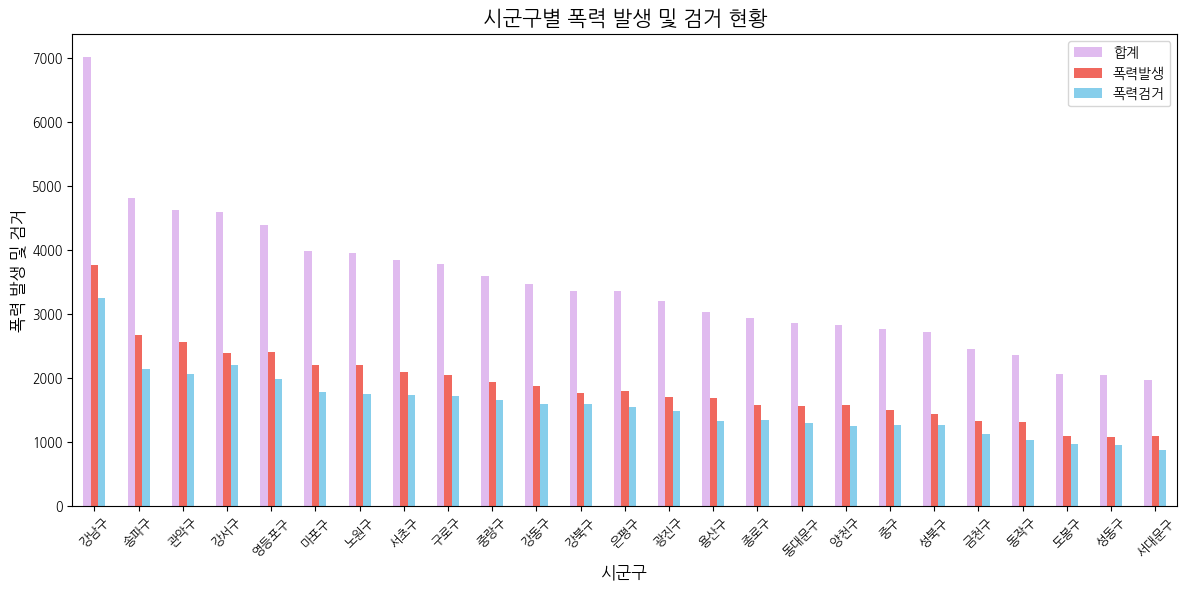

In [110]:

# violence_city_df_sum_sort
# violence_city_df_sum_sort.to_csv("./폭력발생_검거현황.csv", index=False, encoding="cp949")

# x 축에 동 이름 설정
x = violence_city_df_sum_sort['자치구별_2_']

# 각 주택 유형별 막대 그래프 그리기
categories = violence_city_df_sum_sort.columns[1:]
categories
# # # plot() 메서드를 사용하여 그래프 그리기
# violence_city_df_sum_sort.plot(kind='bar', x='자치구별_2_', figsize=(12, 6), fontsize=12, y = categories)
colors = ['#E0BBEF','#F0685E', 'skyblue']  # 원하는 색상으로 변경 가능

# plot() 메서드를 사용하여 그래프 그리기
ax = violence_city_df_sum_sort.plot(kind='bar', x='자치구별_2_', figsize=(12, 6), fontsize=12, y=categories, color=colors)
plt.title("시군구별 폭력 발생 및 검거 현황", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("폭력 발생 및 검거", fontsize=12)
plt.legend(loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./시군구별 폭력 발생 및 검거 현황.png", format="png")

In [30]:
violence_city = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.Crime_Data`"
violence_city_df = client.query(violence_city).to_dataframe()
violence_city_df = violence_city_df[["자치구별_2_","발생합계", "폭력발생", "폭력검거"]]
violence_city_df_1 = violence_city_df[violence_city_df['자치구별_2_'] != '소계']
violence_city_df_sum = violence_city_df_1.groupby('자치구별_2_').sum().reset_index()
violence_city_df_sum_sort = violence_city_df_sum.sort_values(by="발생합계", ascending=False)
violence_city_df_sum_sort

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,자치구별_2_,발생합계,폭력발생,폭력검거
0,강남구,6947,3762,3259
17,송파구,5167,2669,2148
4,관악구,4879,2567,2066
19,영등포구,4819,2415,1981
3,강서구,4663,2401,2201
14,서초구,4459,2101,1741
12,마포구,4096,2205,1790
8,노원구,3896,2206,1757
6,구로구,3857,2056,1726
1,강동구,3711,1872,1599


### 시군구별 실업률

In [32]:
unemployment_city = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.unemployment`"
unemployment_city_df = client.query(unemployment_city).to_dataframe()
# unemployment_city_df
unemployment_city_df_sum = unemployment_city_df.groupby('행정구').sum().reset_index()
unemployment_city_df_sum_sort = unemployment_city_df_sum.sort_values(by="실업률", ascending=False)

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


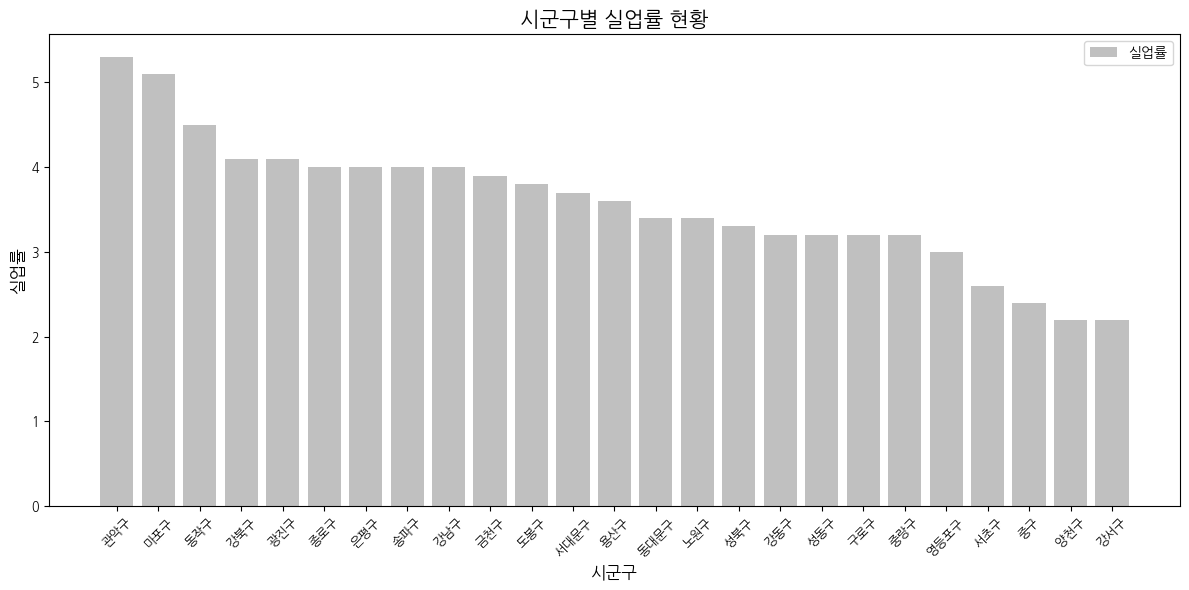

In [47]:
# x 축에 동 이름 설정
x = unemployment_city_df_sum_sort['행정구']

# 각 주택 유형별 막대 그래프 그리기
categories = unemployment_city_df_sum_sort.columns[1]
# categories
# # plot() 메서드를 사용하여 그래프 그리기
# unemployment_city_df_sum_sort.plot(kind='bar', x='행정구', figsize=(12, 6), fontsize=12, y = categories, color="silver")
plt.figure(figsize=(12, 6))
plt.bar(unemployment_city_df_sum_sort['행정구'], unemployment_city_df_sum_sort['실업률'], color="silver")

plt.title("시군구별 실업률 현황", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("실업률", fontsize=12)
plt.legend(["실업률"], loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./시군구별 실업률 현황.png", format="png")

### 시군구별 면적

In [34]:
city_area = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.city_area`"
city_area_df = client.query(city_area).to_dataframe()
# city_area_df
city_area_df_sort = city_area_df.sort_values(by="면적", ascending=False)


C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


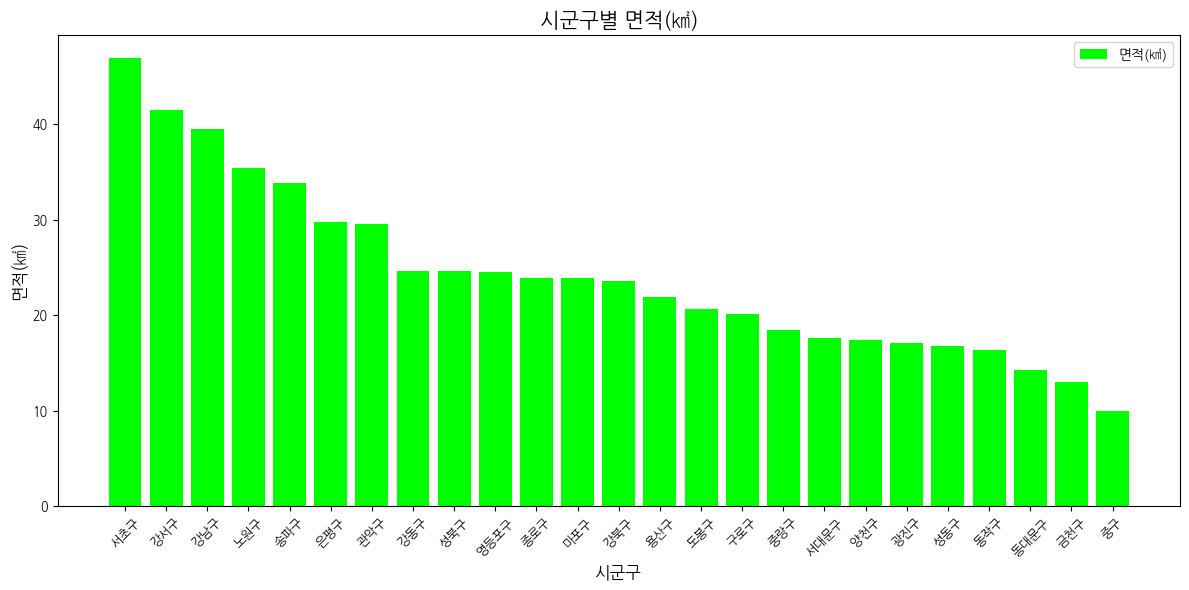

In [49]:

# x 축에 시군구 이름 설정
x =city_area_df_sort["시군구"]

# 카테고리 설정 (번호 열만 선택)
categories = ["면적"]

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x, city_area_df_sort["면적"], color='lime')

plt.title("시군구별 면적(㎢)", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("면적(㎢)", fontsize=12)
plt.legend(["면적(㎢)"], loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
# plt.savefig("./시군구별 경찰서 현황.png", format="png")

### 인구수

In [35]:
city_people = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.city_people`"
city_people_df = client.query(city_people).to_dataframe()
# city_people_df
city_people_df_sort = city_people_df.sort_values(by="소계_전체", ascending=False)


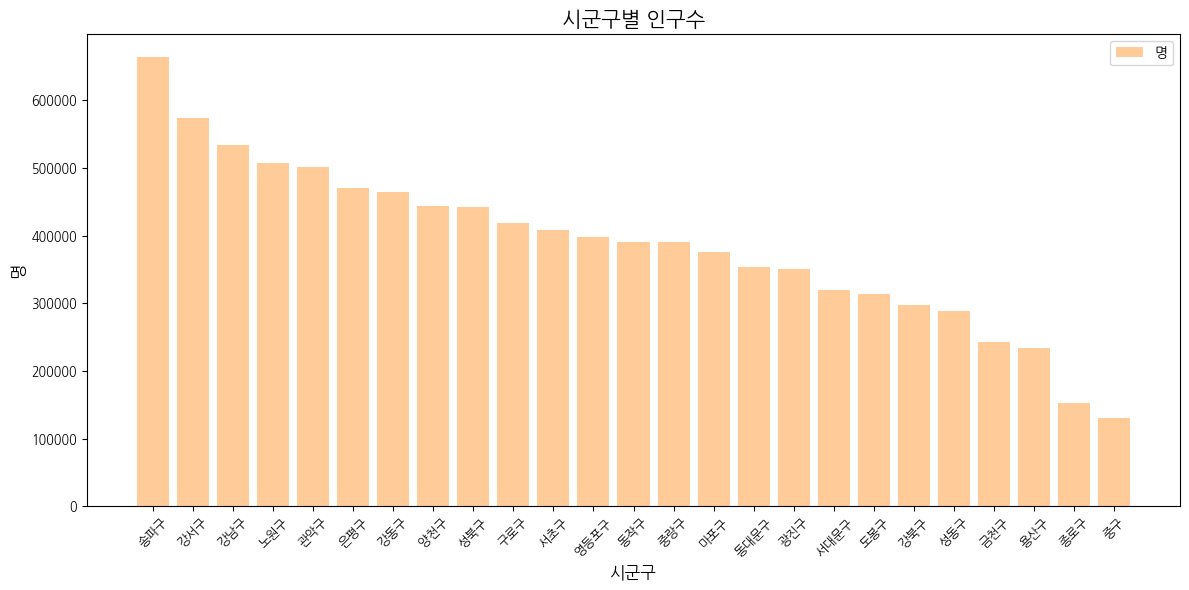

In [51]:
# x 축에 시군구 이름 설정
x = city_people_df_sort["시군구"]

# 카테고리 설정 (번호 열만 선택)
categories = ["소계_전체"]

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x, city_people_df_sort["소계_전체"], color='#FFCC99')

plt.title("시군구별 인구수", fontsize=15)
plt.xlabel("시군구", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.legend(["명"], loc="upper right")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
# plt.savefig("./시군구별 경찰서 현황.png", format="png")

### 음식점 수

In [37]:
store = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.store`"
store_df = client.query(store).to_dataframe()
store_df = store_df[["행정구", "개방서비스명", "업태구분명"]]
service_counts = store_df['개방서비스명'].value_counts()
grouped = store_df.groupby(['행정구', '개방서비스명']).size().unstack().fillna(0)
grouped["합계"] = grouped["단란주점영업"] + grouped["외국인전용유흥음식점업"] + grouped["유흥주점영업"] + grouped["일반음식점"]
grouped_sort = grouped.sort_values(by="합계", ascending=False)

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [38]:
# store_df

In [55]:
# service_counts 

개방서비스명
일반음식점          124760
단란주점영업           1992
유흥주점영업           1753
외국인전용유흥음식점업         3
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

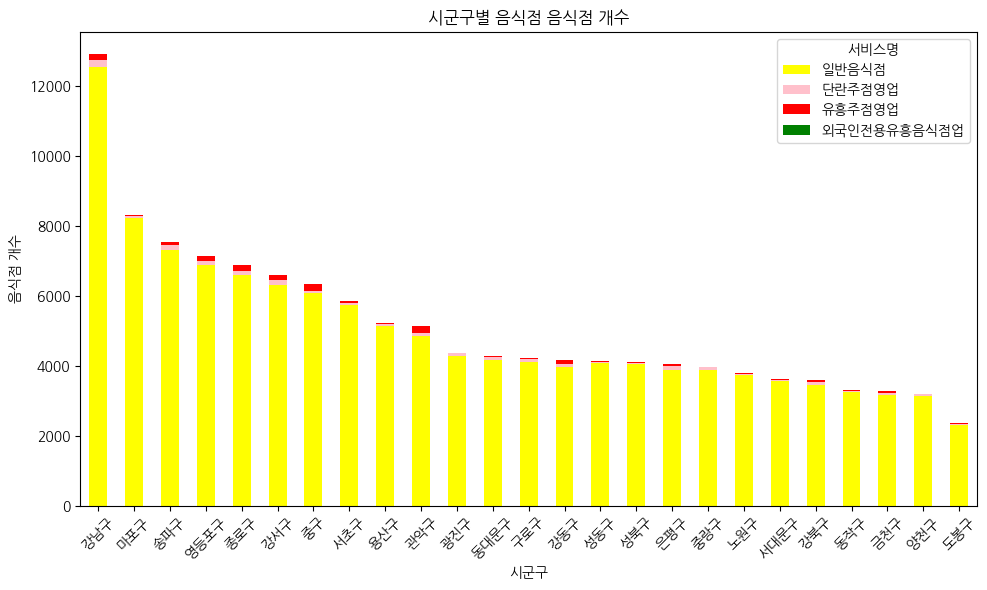

In [179]:

# grouped = grouped.sort_values("개방서비스명")
# grouped_sort
# 색상 지정
colors = {'유흥주점영업': 'red', '일반음식점': 'yellow', '단란주점영업' : 'pink', '외국인전용유흥음식점업': 'green'}

categories = grouped_sort.columns[1:3]
categories

df_ordered = grouped_sort[['일반음식점', '단란주점영업', '유흥주점영업', '외국인전용유흥음식점업']]
plt.figure(figsize=(12, 6))
# 색상 지정
# Stacked Bar Chart 그리기
df_ordered.plot(kind='bar', stacked=True, color=[colors.get(col, 'gray') for col in df_ordered.columns], figsize=(10, 6))

# 막대 그래프 생성
# grouped_sort.plot(kind='bar', stacked=True, color=[colors.get(x, 'blue') for x in grouped.columns], figsize=(12, 8), y=categories)

# 그래프 제목 및 라벨 설정
plt.title('시군구별 음식점 음식점 개수')
plt.xlabel('시군구')
plt.ylabel('음식점 개수')
plt.xticks(rotation=45)
plt.legend(title='서비스명')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("./서울시 시군구별 음식점 빈도수_4개.png", format="png")

### 폭력 vs 가로등개수와의 상관관계

In [39]:
violence_city = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.Crime_Data`"
violence_city_df = client.query(violence_city).to_dataframe()
violence_city_df = violence_city_df[["자치구별_2_","발생합계", "폭력발생", "폭력검거"]]
violence_city_df_1 = violence_city_df[violence_city_df['자치구별_2_'] != '소계']
violence_city_df_sum = violence_city_df_1.groupby('자치구별_2_').sum().reset_index()
violence_city_df_sum_sort = violence_city_df_sum.sort_values(by="발생합계", ascending=False)
# violence_city_df_sum_sort

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [40]:
emergencty_bell_location = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.emergencty_bell_location`"
emergencty_bell_location_df = client.query(emergencty_bell_location).to_dataframe()
emergencty_bell_location_df["가로등개수"] = 1
# emergencty_bell_location_df
emergencty_bell_location_sum = emergencty_bell_location_df.groupby("시군구").sum().reset_index()
emergencty_bell_location_sum_sort = emergencty_bell_location_sum.sort_values(by="가로등개수", ascending=False)
# emergencty_bell_location_sum_sort

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [41]:
merge_city_v_lamp = pd.merge(left=violence_city_df_sum_sort, right=emergencty_bell_location_sum_sort, how="left", left_on="자치구별_2_", right_on="시군구")

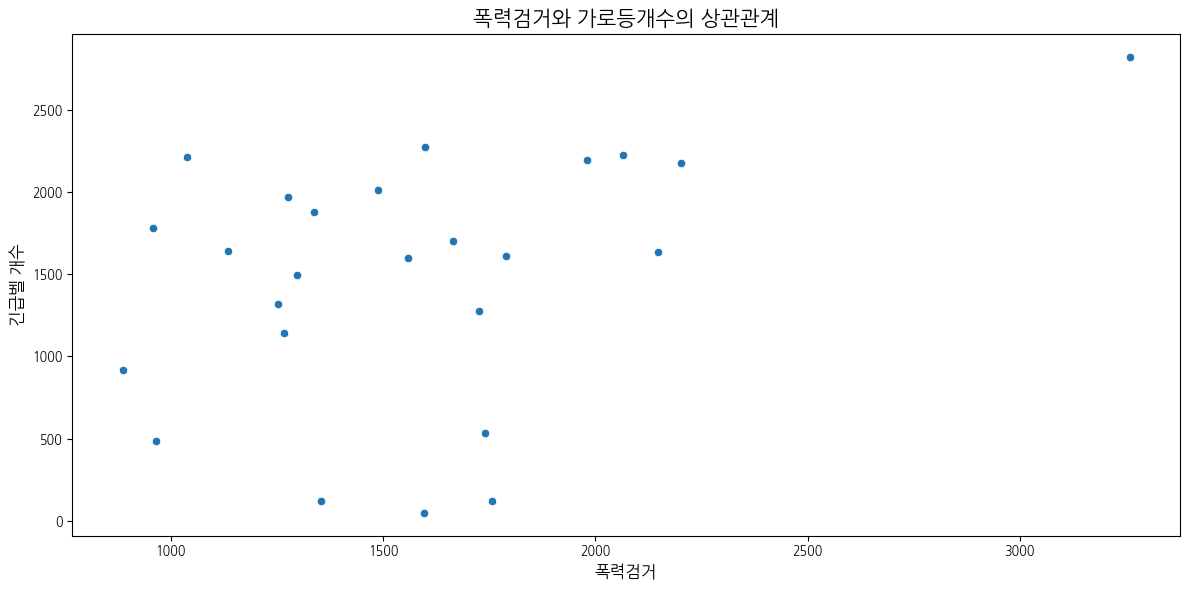

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="폭력검거", y="가로등개수", data=merge_city_v_lamp)
plt.title("폭력검거와 가로등개수의 상관관계", fontsize=15)
plt.xlabel("폭력검거", fontsize=12)
plt.ylabel("긴급벨 개수", fontsize=12)
_=plt.xticks(fontsize=9, rotation=00)
_=plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./폭력검거와 긴급벨의 상관관계.png", format="png")

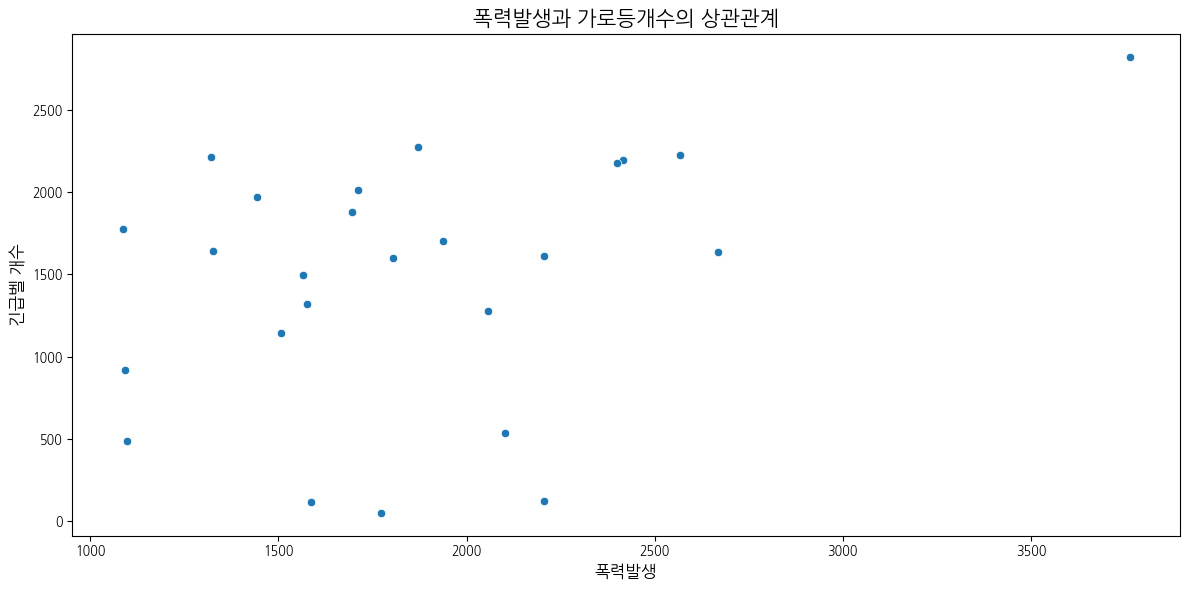

In [65]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="폭력발생", y="가로등개수", data=merge_city_v_lamp)
plt.title("폭력발생과 가로등개수의 상관관계", fontsize=15)
plt.xlabel("폭력발생", fontsize=12)
plt.ylabel("긴급벨 개수", fontsize=12)
_=plt.xticks(fontsize=9, rotation=00)
_=plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("./폭력발생과 긴급벨의 상관관계.png", format="png")

In [42]:
cctv_count = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.cctv_location`"
cctv_count_df = client.query(cctv_count).to_dataframe()
cctv_count_sum = cctv_count_df.groupby("자치구명")["CCTV 수량"].sum()
cctv_count_sum_sort = cctv_count_sum.sort_values(ascending=False)
cctv_count_sum_sort

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


자치구명
강남구     13831.0
관악구     10007.0
서초구      8761.1
구로구      8371.0
은평구      7651.0
성북구      7568.0
광진구      7237.0
중랑구      7219.0
양천구      6975.0
영등포구     6671.0
서대문구     6087.0
강서구      5918.0
송파구      5817.0
강동구      5732.0
강북구      5621.0
동대문구     5485.0
성동구      5292.0
금천구      5137.0
동작구      4675.0
노원구      4664.0
중구       4650.0
마포구      4311.0
종로구      3578.0
도봉구      3000.0
용산구      2576.0
Name: CCTV 수량, dtype: float64

In [43]:
merge_city_v_cctv = pd.merge(left=violence_city_df_sum_sort, right=cctv_count_sum_sort, how="left", left_on="자치구별_2_", right_on="자치구명")

In [44]:
merge_city_v_cctv

,자치구별_2_,발생합계,폭력발생,폭력검거,CCTV 수량
0,강남구,6947,3762,3259,13831.0
1,송파구,5167,2669,2148,5817.0
2,관악구,4879,2567,2066,10007.0
3,영등포구,4819,2415,1981,6671.0
4,강서구,4663,2401,2201,5918.0
5,서초구,4459,2101,1741,8761.1
6,마포구,4096,2205,1790,4311.0
7,노원구,3896,2206,1757,4664.0
8,구로구,3857,2056,1726,8371.0
9,강동구,3711,1872,1599,5732.0


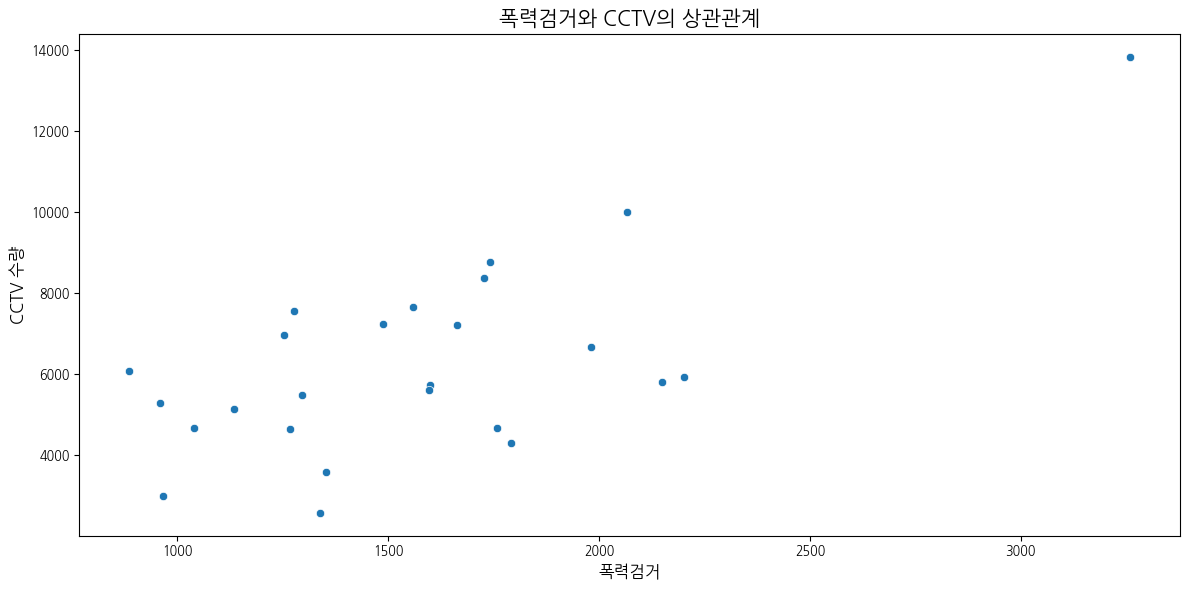

In [70]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="폭력검거", y="CCTV 수량", data=merge_city_v_cctv)
plt.title("폭력검거와 CCTV의 상관관계", fontsize=15)
plt.xlabel("폭력검거", fontsize=12)
plt.ylabel("CCTV 수량", fontsize=12)
_=plt.xticks(fontsize=9, rotation=00)
_=plt.yticks(fontsize=9)
# plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig("./폭력검거와 CCTV 상관관계.png", format="png")

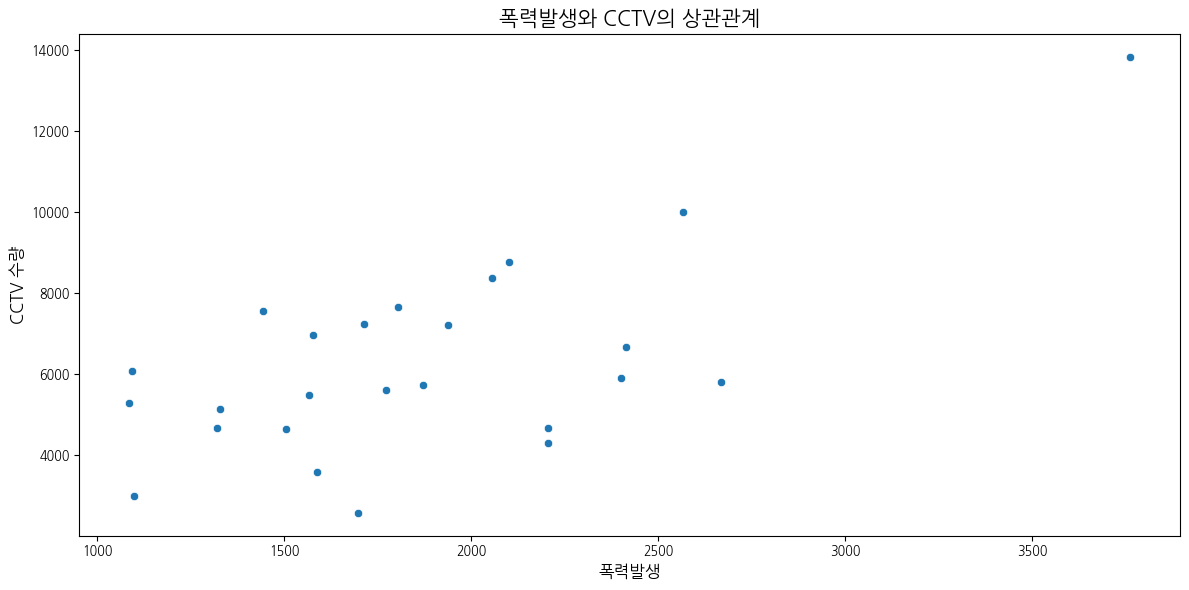

In [72]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="폭력발생", y="CCTV 수량", data=merge_city_v_cctv)
plt.title("폭력발생와 CCTV의 상관관계", fontsize=15)
plt.xlabel("폭력발생", fontsize=12)
plt.ylabel("CCTV 수량", fontsize=12)
_=plt.xticks(fontsize=9, rotation=00)
_=plt.yticks(fontsize=9)
# plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig("./폭력발생과 CCTV 상관관계.png", format="png")

In [45]:
merge_city_v_lamp = pd.merge(left=violence_city_df_sum_sort, right=emergencty_bell_location_sum_sort, how="left", left_on="자치구별_2_", right_on="시군구")

In [46]:
merge_city_v_cctv = pd.merge(left=violence_city_df_sum_sort, right=cctv_count_sum_sort, how="left", left_on="자치구별_2_", right_on="자치구명")

In [47]:
final_merge = pd.merge(
    left=merge_city_v_lamp, 
    right=cctv_count_sum_sort, 
    how="left", 
    left_on="자치구별_2_", 
    right_on="자치구명"
)
# final_merge

In [48]:
df = final_merge[["시군구", "발생합계","폭력발생", "폭력검거", "가로등개수", "CCTV 수량"]]
df = df.sort_values("폭력발생", ascending=False)
df

,시군구,발생합계,폭력발생,폭력검거,가로등개수,CCTV 수량
0,강남구,6947,3762,3259,2820,13831.0
1,송파구,5167,2669,2148,1634,5817.0
2,관악구,4879,2567,2066,2226,10007.0
3,영등포구,4819,2415,1981,2193,6671.0
4,강서구,4663,2401,2201,2178,5918.0
7,노원구,3896,2206,1757,123,4664.0
6,마포구,4096,2205,1790,1610,4311.0
5,서초구,4459,2101,1741,532,8761.1
8,구로구,3857,2056,1726,1277,8371.0
11,중랑구,3599,1937,1664,1702,7219.0


C:\Users\ektjw\AppData\Local\Temp\ipykernel_4544\561588361.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['시군구'], rotation=90)


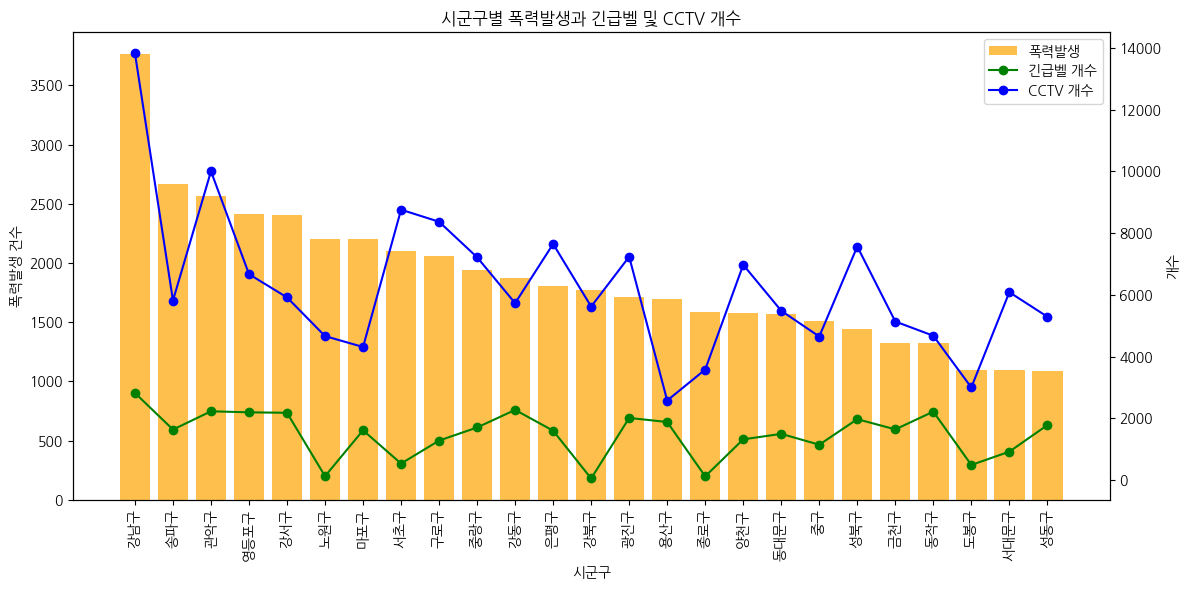

In [78]:
# 막대 그래프 및 선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 폭력발생 막대 그래프 (왼쪽 y축)
ax1.bar(df['시군구'], df['폭력발생'], color='orange', alpha=0.7, label='폭력발생')
ax1.set_xlabel('시군구')
ax1.set_ylabel('폭력발생 건수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(df['시군구'], rotation=90)

# 오른쪽 y축
ax2 = ax1.twinx()
ax2.plot(df['시군구'], df['가로등개수'], color='green', marker='o', label='긴급벨 개수')
ax2.plot(df['시군구'], df['CCTV 수량'], color='blue', marker='o', label='CCTV 개수')
ax2.set_ylabel('개수', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# 범례 추가
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# 제목 추가
plt.title('시군구별 폭력발생과 긴급벨 및 CCTV 개수')

# 그래프 저장 혹은 출력
plt.tight_layout()
plt.savefig("./시군구별 폭력발생 및 긴급벨 및 CCTV 개수.png", format="png")

C:\Users\ektjw\AppData\Local\Temp\ipykernel_4544\1036178604.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['시군구'], rotation=90)


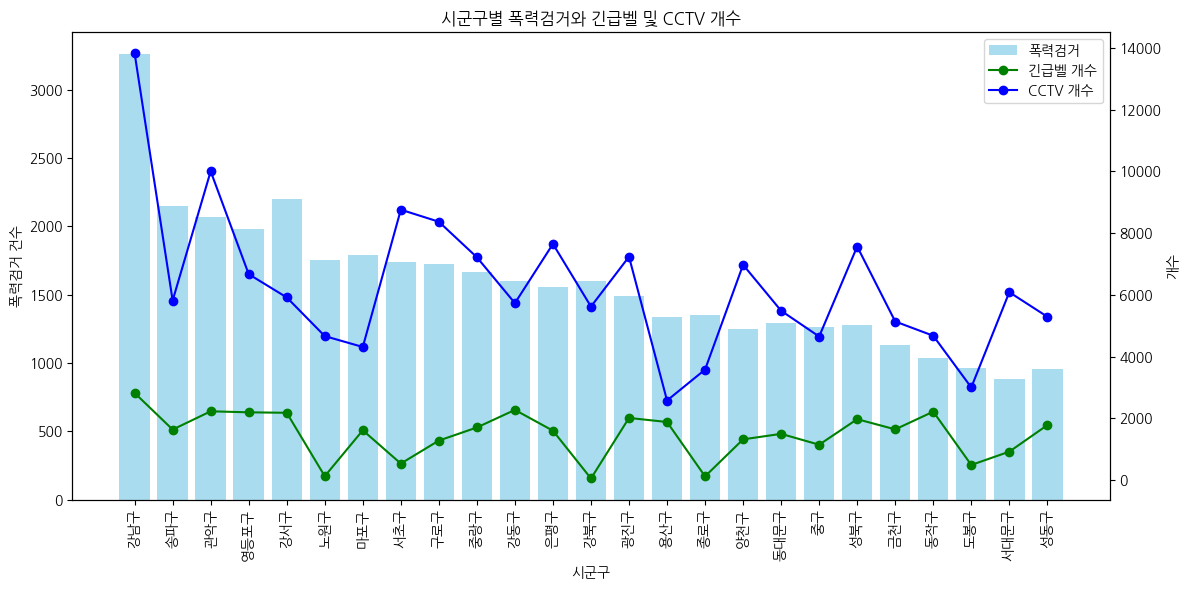

In [79]:
# 막대 그래프 및 선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 폭력발생 막대 그래프 (왼쪽 y축)
ax1.bar(df['시군구'], df['폭력검거'], color='skyblue', alpha=0.7, label='폭력검거')
ax1.set_xlabel('시군구')
ax1.set_ylabel('폭력검거 건수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(df['시군구'], rotation=90)

# 오른쪽 y축
ax2 = ax1.twinx()
ax2.plot(df['시군구'], df['가로등개수'], color='green', marker='o', label='긴급벨 개수')
ax2.plot(df['시군구'], df['CCTV 수량'], color='blue', marker='o', label='CCTV 개수')
ax2.set_ylabel('개수', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# 범례 추가
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# 제목 추가
plt.title('시군구별 폭력검거와 긴급벨 및 CCTV 개수')

# 그래프 저장 혹은 출력
plt.tight_layout()
plt.savefig("./시군구별 폭력검거 및 긴급벨 및 CCTV 개수.png", format="png")

### 범죄 밀도와 비교: 각 구의 면적 대비 범죄 건수를 비교하여 범죄 밀도를 계산한 후, 긴급벨 설치 개수와 비교해볼 수 있습니다.


In [75]:
# final_merge

In [76]:
# city_area_df_sort

In [49]:
final_city_area_merge = pd.merge(
    left=final_merge, 
    right=city_area_df_sort, 
    how="left", 
    left_on="시군구", 
    right_on="시군구"
)
# final_city_area_merge[[?

In [50]:
final_city_area_merge["범죄 밀도"] = final_city_area_merge["폭력발생"] / final_city_area_merge["면적"]

In [82]:
# final_city_area_merge

In [51]:
final_city_area_merge_graph = final_city_area_merge.sort_values("범죄 밀도", ascending=False)
# final_city_area_merge_graph

C:\Users\ektjw\AppData\Local\Temp\ipykernel_4544\514646373.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(final_city_area_merge_graph['시군구'], rotation=90)


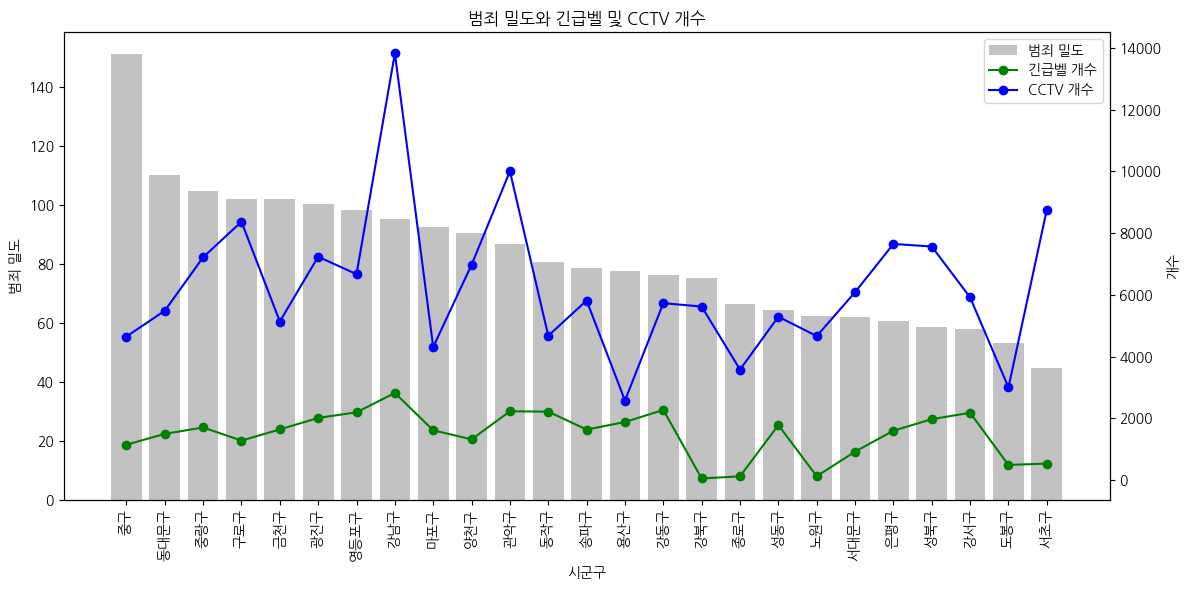

In [84]:
# 막대 그래프 및 선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 폭력발생 막대 그래프 (왼쪽 y축)
ax1.bar(final_city_area_merge_graph['시군구'], final_city_area_merge_graph['범죄 밀도'], color='darkgray', alpha=0.7, label='범죄 밀도')
ax1.set_xlabel('시군구')
ax1.set_ylabel('범죄 밀도', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(final_city_area_merge_graph['시군구'], rotation=90)

# 오른쪽 y축
ax2 = ax1.twinx()
ax2.plot(final_city_area_merge_graph['시군구'], final_city_area_merge_graph['가로등개수'], color='green', marker='o', label='긴급벨 개수')
ax2.plot(final_city_area_merge_graph['시군구'], final_city_area_merge_graph['CCTV 수량'], color='blue', marker='o', label='CCTV 개수')
ax2.set_ylabel('개수', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# 범례 추가
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# 제목 추가
plt.title('범죄 밀도와 긴급벨 및 CCTV 개수')

# 그래프 저장 혹은 출력
plt.tight_layout()
plt.savefig("./시군구별 범죄 밀도와 긴급벨 및 CCTV 개수.png", format="png")

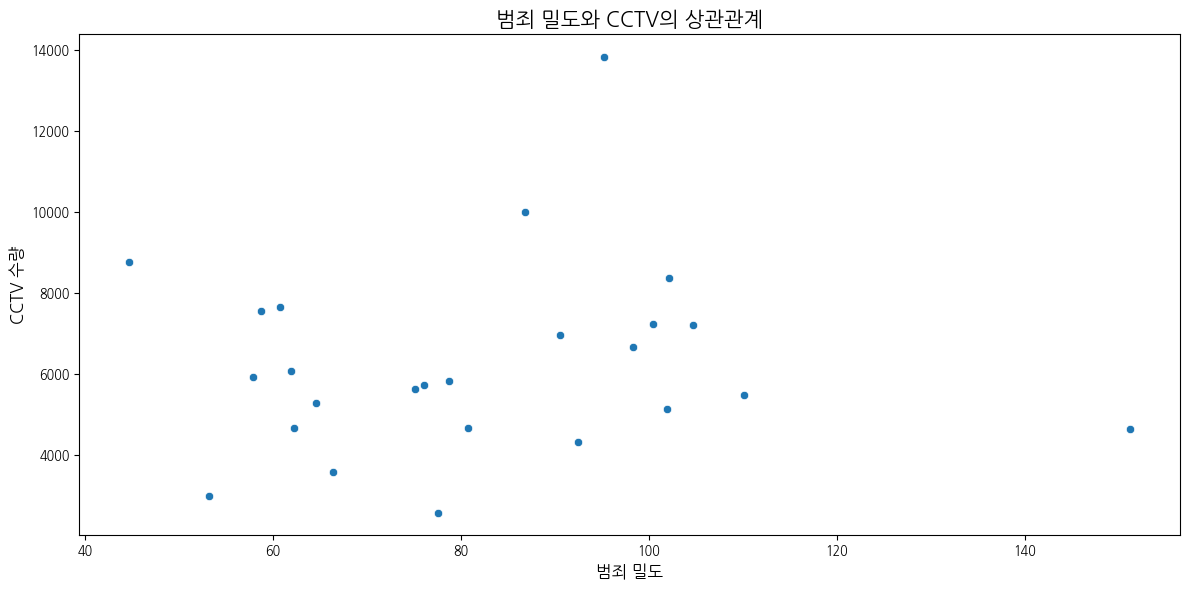

In [85]:
# 각 구의 면적 대비 범죄 건수를 비교하여 범죄 밀도를 계산하였는데 범죄 밀도가 높을 수록, CCTV 수량이 많음. 따라서 범죄율이 줄어들 것이다.

plt.figure(figsize=(12,6))
sns.scatterplot(x="범죄 밀도", y="CCTV 수량", data=final_city_area_merge_graph)
plt.title("범죄 밀도와 CCTV의 상관관계", fontsize=15)
plt.xlabel("범죄 밀도", fontsize=12)
plt.ylabel("CCTV 수량", fontsize=12)
_=plt.xticks(fontsize=9, rotation=00)
_=plt.yticks(fontsize=9)
# plt.legend(fontsize=13)
plt.tight_layout()
# plt.savefig("./폭력발생과 CCTV 상관관계.png", format="png")

### 다른 요인들의 영향력 분석: 죄율에 영향을 미치는 다른 요인들(예: 경제적 상황, 교육 수준, 경찰력 등)을 고려하여 그 영향력을 분석해볼 수 있습니다. 이를 통해 CCTV 설치 외에도 범죄율에 영향을 미치는 다른 요인들을 파악할 수 있습니다.


In [86]:
# police_address_sum_sort

In [52]:
final_city_area_police_merge = pd.merge(
    left=final_city_area_merge, 
    right=police_address_sum_sort, 
    how="left", 
    left_on="시군구", 
    right_on="시군구"
)

In [53]:
final_city_area_police_merge = final_city_area_police_merge.sort_values("번호", ascending=False)
# final_city_area_police_merge

C:\Users\ektjw\AppData\Local\Temp\ipykernel_11900\4019156884.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(final_city_area_police_merge ['시군구'], rotation=90)


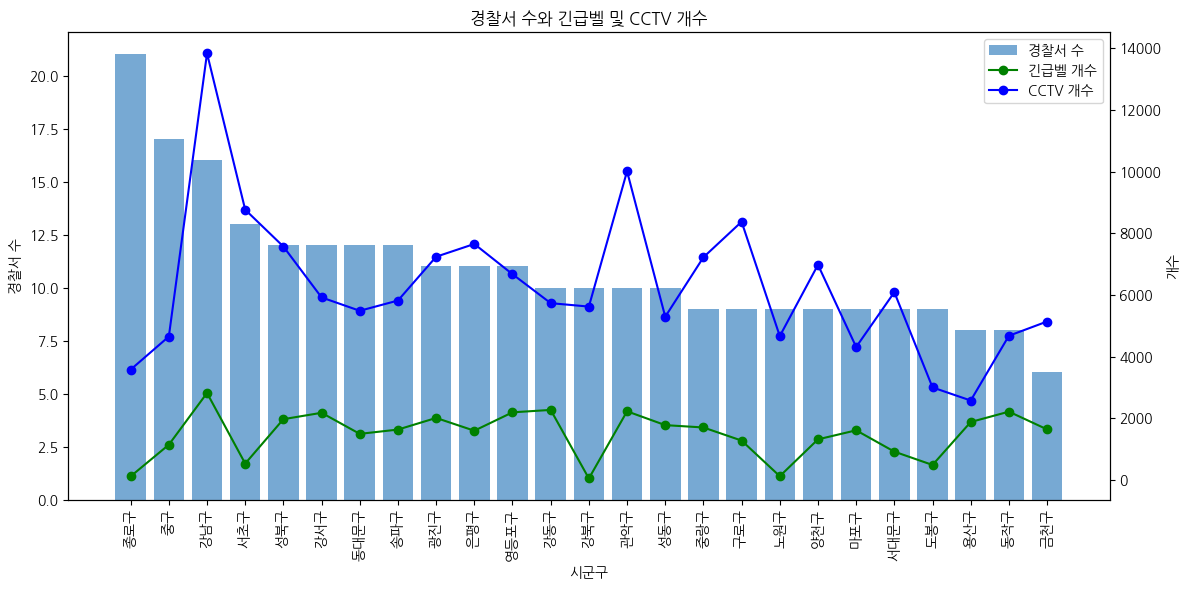

In [54]:
# 막대 그래프 및 선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 폭력발생 막대 그래프 (왼쪽 y축)
ax1.bar(final_city_area_police_merge ['시군구'],final_city_area_police_merge ['번호'], color='#3D85C1', alpha=0.7, label='경찰서 수')
ax1.set_xlabel('시군구')
ax1.set_ylabel('경찰서 수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(final_city_area_police_merge ['시군구'], rotation=90)

# 오른쪽 y축
ax2 = ax1.twinx()
ax2.plot(final_city_area_police_merge ['시군구'], final_city_area_police_merge ['가로등개수'], color='green', marker='o', label='긴급벨 개수')
ax2.plot(final_city_area_police_merge ['시군구'], final_city_area_police_merge ['CCTV 수량'], color='blue', marker='o', label='CCTV 개수')
ax2.set_ylabel('개수', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# 범례 추가
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# 제목 추가
plt.title('경찰서 수와 긴급벨 및 CCTV 개수')

# 그래프 저장 혹은 출력
plt.tight_layout()
plt.savefig("./시군구별 경찰서 수와 긴급벨 및 CCTV 개수.png", format="png")

C:\Users\ektjw\AppData\Local\Temp\ipykernel_4544\2188425570.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(final_city_area_police_merge ['시군구'], rotation=90)


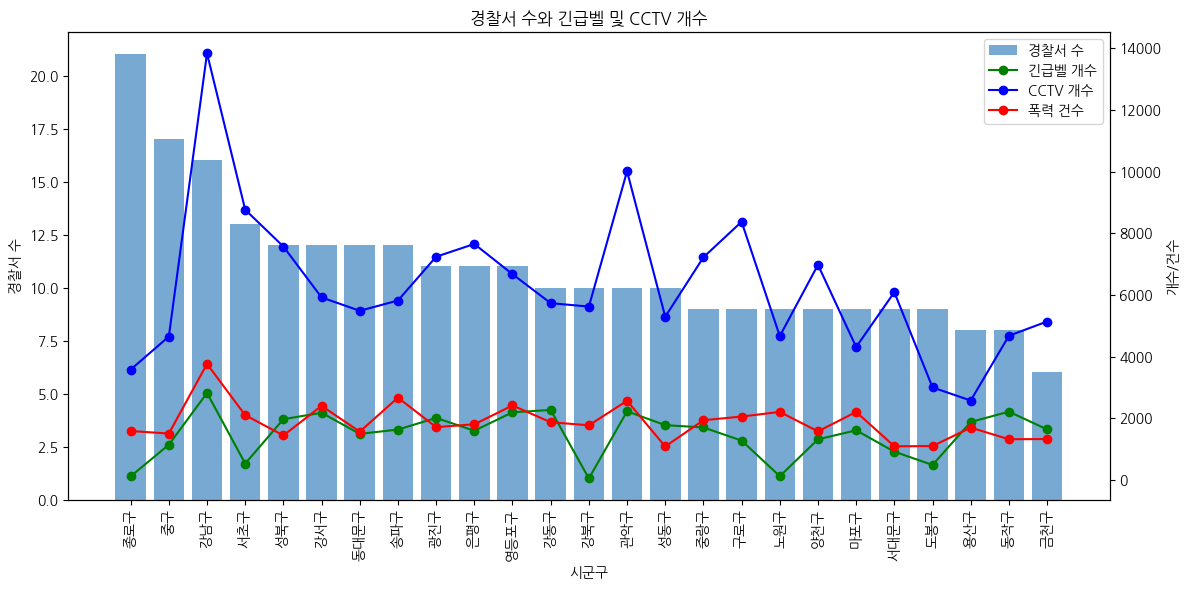

In [90]:
# 막대 그래프 및 선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 폭력발생 막대 그래프 (왼쪽 y축)
ax1.bar(final_city_area_police_merge ['시군구'],final_city_area_police_merge ['번호'], color='#3D85C1', alpha=0.7, label='경찰서 수')
ax1.set_xlabel('시군구')
ax1.set_ylabel('경찰서 수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(final_city_area_police_merge ['시군구'], rotation=90)

# 오른쪽 y축
ax2 = ax1.twinx()
ax2.plot(final_city_area_police_merge ['시군구'], final_city_area_police_merge ['가로등개수'], color='green', marker='o', label='긴급벨 개수')
ax2.plot(final_city_area_police_merge ['시군구'], final_city_area_police_merge ['CCTV 수량'], color='blue', marker='o', label='CCTV 개수')
ax2.plot(final_city_area_police_merge ['시군구'], final_city_area_police_merge ['폭력발생'], color='red', marker='o', label='폭력 건수')
ax2.set_ylabel('개수/건수', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# 범례 추가
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# 제목 추가
plt.title('경찰서 수와 긴급벨 및 CCTV 개수')

# 그래프 저장 혹은 출력
plt.tight_layout()
# plt.savefig("./시군구별 경찰서 수와 긴급벨 및 CCTV 개수.png", format="png")

### 인구수도 같이 보기

In [ ]:
# city_people_df_sort / final_city_area_police_merge 

In [55]:
final_city_area_police_people_merge = pd.merge(
    left=final_city_area_police_merge, 
    right=city_people_df_sort, 
    how="left", 
    left_on="시군구", 
    right_on="시군구"
)

In [94]:
# final_city_area_police_people_merge

In [56]:
final_city_area_police_people_merge = final_city_area_police_people_merge.sort_values("폭력발생", ascending=False)
# final_city_area_police_people_merge.to_csv("./폭력발생 건수와 긴급벨 및 CCTV 개수.csv", index=False, encoding="utf-8-sig")

C:\Users\ektjw\AppData\Local\Temp\ipykernel_4544\4094665950.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(final_city_area_police_people_merge['시군구'], rotation=90)


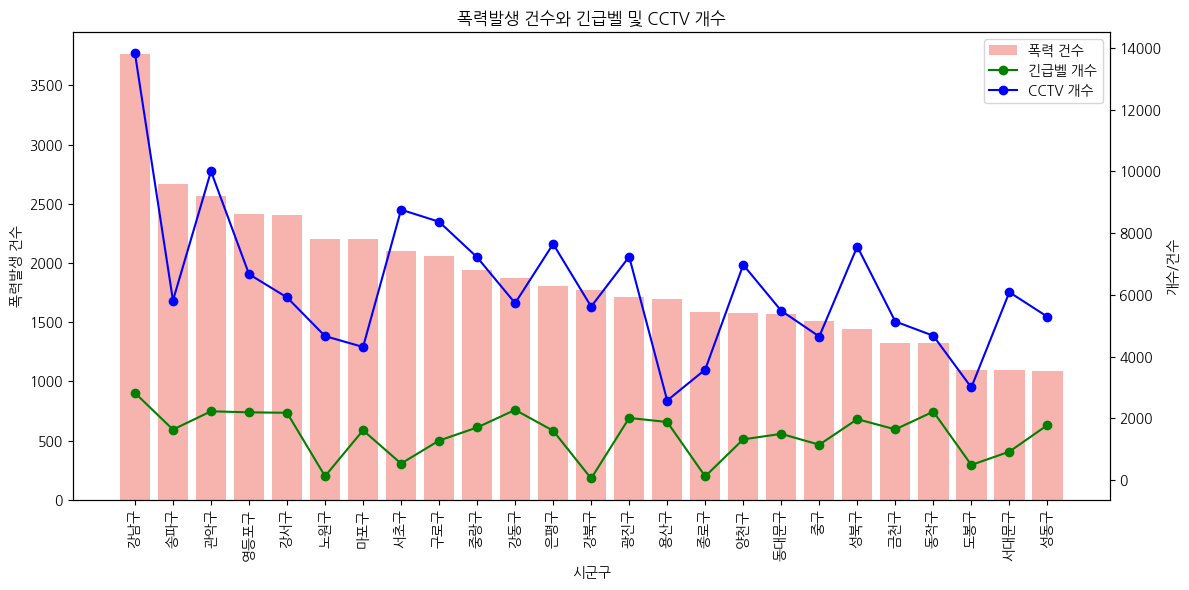

In [97]:
# 막대 그래프 및 선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 폭력발생 막대 그래프 (왼쪽 y축)
ax1.bar(final_city_area_police_people_merge['시군구'], final_city_area_police_people_merge['폭력발생'], color='#F0685E', alpha=0.5, label='폭력 건수')
# ax1.bar(final_city_area_police_people_merge['시군구'],final_city_area_police_people_merge['번호'], color='#3D85C1', alpha=0.7, label='경찰서 수')
ax1.set_xlabel('시군구')
ax1.set_ylabel('폭력발생 건수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(final_city_area_police_people_merge['시군구'], rotation=90)

# 오른쪽 y축
ax2 = ax1.twinx()
ax2.plot(final_city_area_police_people_merge['시군구'], final_city_area_police_people_merge['가로등개수'], color='green', marker='o', label='긴급벨 개수')
ax2.plot(final_city_area_police_people_merge['시군구'], final_city_area_police_people_merge['CCTV 수량'], color='blue', marker='o', label='CCTV 개수')
# ax2.plot(final_city_area_police_people_merge['시군구'], final_city_area_police_people_merge['폭력발생'], color='red', marker='o', label='폭력 건수')
# ax2.plot(final_city_area_police_people_merge['시군구'], final_city_area_police_people_merge['소계_전체'], color='#FFCC99', marker='o', label='명')
ax2.set_ylabel('개수/건수', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# 범례 추가
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# 제목 추가
plt.title('폭력발생 건수와 긴급벨 및 CCTV 개수')

# 그래프 저장 혹은 출력
plt.tight_layout()
plt.savefig("./시군구별 폭력발생 건수와 긴급벨 및 CCTV 개수.png", format="png")

In [57]:
final_city_area_police_people_merge = final_city_area_police_people_merge.sort_values("소계_전체", ascending=False)

C:\Users\ektjw\AppData\Local\Temp\ipykernel_4544\2658041104.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(final_city_area_police_people_merge['시군구'], rotation=90)


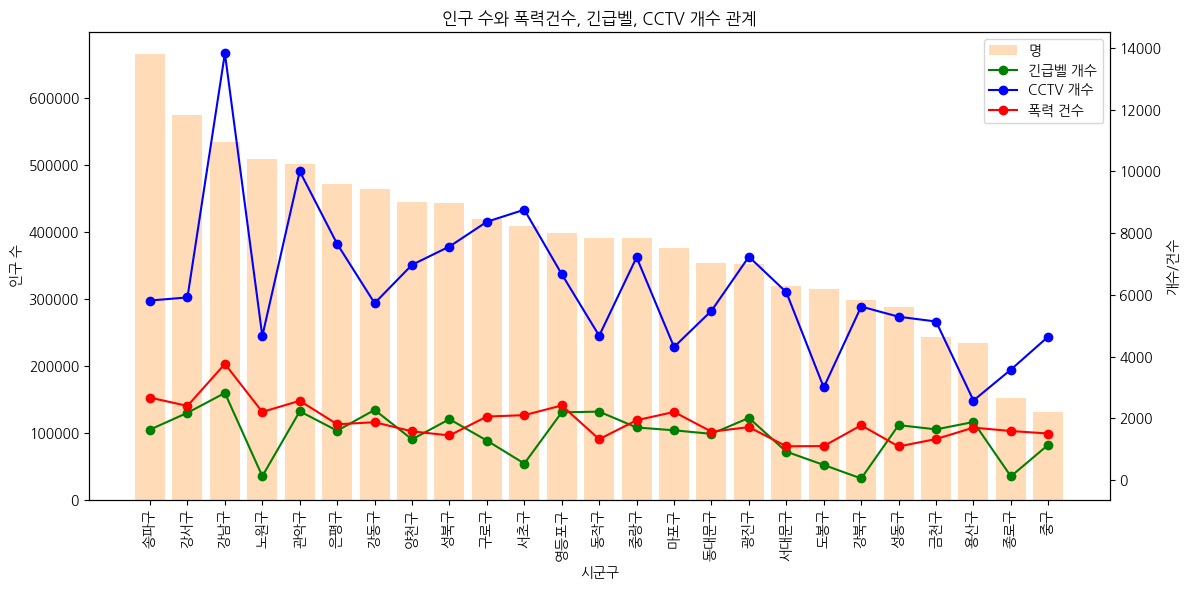

In [99]:
# 막대 그래프 및 선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 폭력발생 막대 그래프 (왼쪽 y축)
ax1.bar(final_city_area_police_people_merge['시군구'], final_city_area_police_people_merge['소계_전체'], color='#FFCC99', alpha=0.7, label='명')
# ax1.bar(final_city_area_police_people_merge['시군구'],final_city_area_police_people_merge['번호'], color='#3D85C1', alpha=0.7, label='경찰서 수')
ax1.set_xlabel('시군구')
ax1.set_ylabel('인구 수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(final_city_area_police_people_merge['시군구'], rotation=90)

# 오른쪽 y축
ax2 = ax1.twinx()
ax2.plot(final_city_area_police_people_merge['시군구'], final_city_area_police_people_merge['가로등개수'], color='green', marker='o', label='긴급벨 개수')
ax2.plot(final_city_area_police_people_merge['시군구'], final_city_area_police_people_merge['CCTV 수량'], color='blue', marker='o', label='CCTV 개수')
ax2.plot(final_city_area_police_people_merge['시군구'], final_city_area_police_people_merge['폭력발생'], color='red', marker='o', label='폭력 건수')
# ax2.plot(final_city_area_police_people_merge['시군구'], final_city_area_police_people_merge['소계_전체'], color='#FFCC99', marker='o', label='명')
ax2.set_ylabel('개수/건수', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# 범례 추가
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# 제목 추가
plt.title('인구 수와 폭력건수, 긴급벨, CCTV 개수 관계')

# 그래프 저장 혹은 출력
plt.tight_layout()
plt.savefig("./인구 수와 폭력건수, 긴급벨, CCTV 개수 관계.png", format="png")

In [59]:
final_city_area_police_people_food_merge = pd.merge(
    left=final_city_area_police_people_merge, 
    right=grouped_sort, 
    how="left", 
    left_on="시군구", 
    right_on="행정구"
)

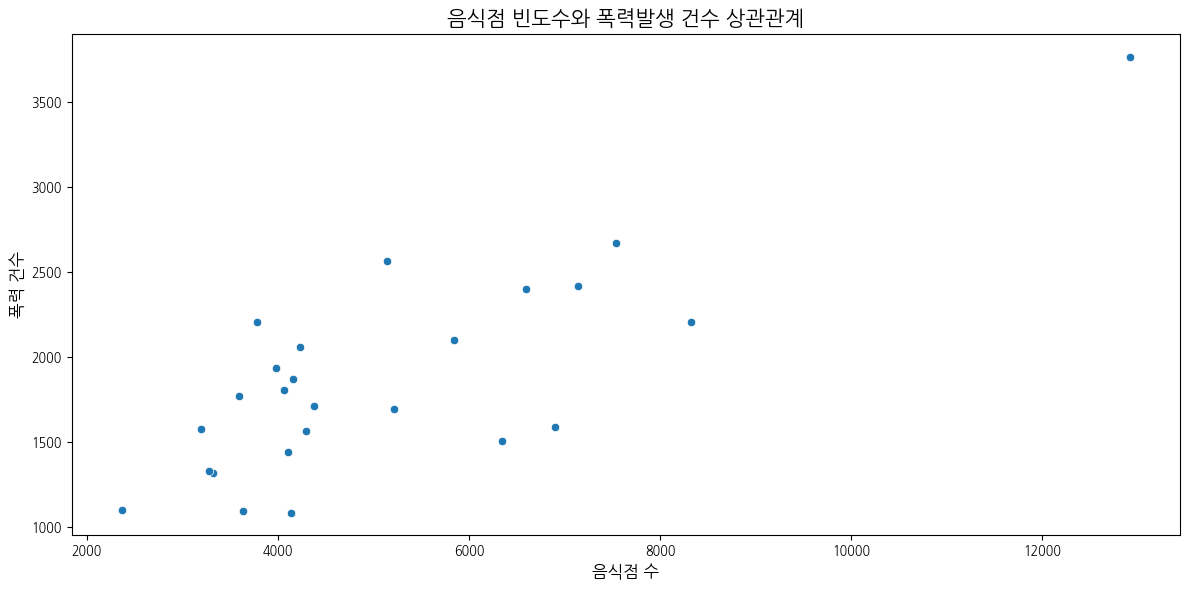

In [60]:
# 각 구의 면적 대비 범죄 건수를 비교하여 범죄 밀도를 계산하였는데 범죄 밀도가 높을 수록, CCTV 수량이 많음. 따라서 범죄율이 줄어들 것이다.

plt.figure(figsize=(12,6))
sns.scatterplot(x="합계", y="폭력발생", data=final_city_area_police_people_food_merge)
plt.title("음식점 빈도수와 폭력발생 건수 상관관계", fontsize=15)
plt.xlabel("음식점 수", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
_=plt.xticks(fontsize=9, rotation=00)
_=plt.yticks(fontsize=9)
# plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig("./음식점 수와 폭력발생 건수 상관관계.png", format="png")

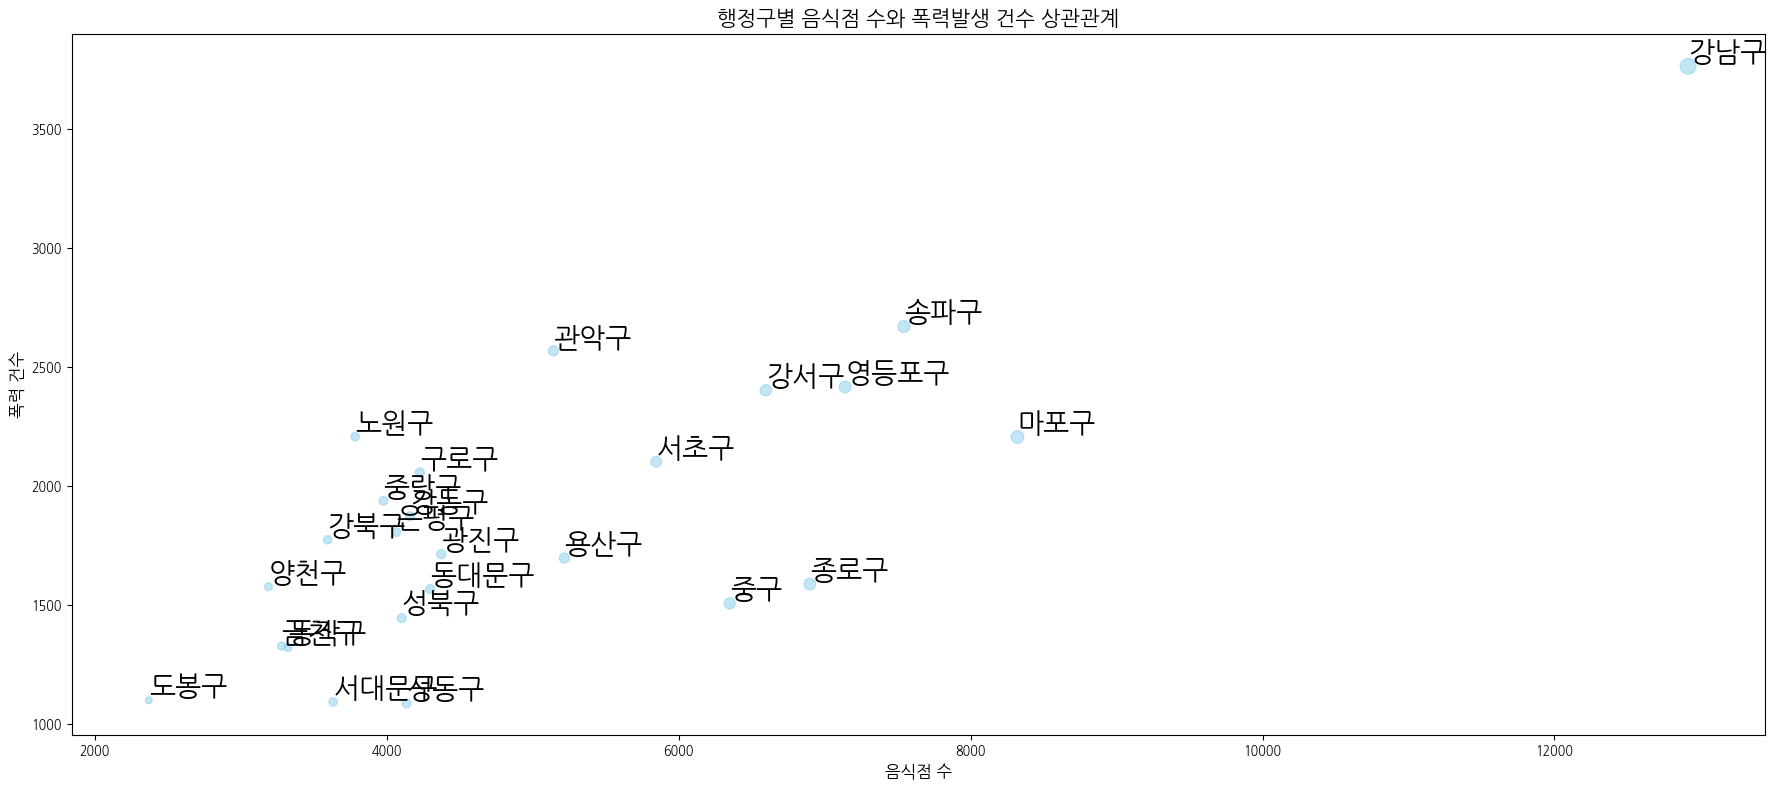

In [61]:

plt.figure(figsize=(18,8))
# plt.figure(figsize=(12,11))
scatter = plt.scatter(
    final_city_area_police_people_food_merge['합계'],
    final_city_area_police_people_food_merge['폭력발생'],
    s=final_city_area_police_people_food_merge['합계']/100,  # 포인트 크기
    alpha=0.5,
    c='skyblue'
)

# 각 포인트에 구 이름 추가
texts = []
for i, txt in enumerate(final_city_area_police_people_food_merge['시군구']):
    texts.append(
        plt.text(
            final_city_area_police_people_food_merge['합계'][i],
            final_city_area_police_people_food_merge['폭력발생'][i],
            txt,
            fontsize=20,  # 수정된 fontsize
            ha='left',
            va='bottom',
            color='black'
        )
    )
plt.title("행정구별 음식점 수와 폭력발생 건수 상관관계", fontsize=15)
plt.xlabel("음식점 수", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
_=plt.xticks(fontsize=9, rotation=00)
_=plt.yticks(fontsize=9)
# plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig("./행정구별 음식점수와 폭력발생 건수 상관관계.png", format="png")

In [ ]:
plt.figure(figsize=(12,6))

# Scatter plot with CCTV count on x-axis and violent crime incidents on y-axis
scatter = plt.scatter(
    final_city_area_police_people_food_merge['가로등개수'],
    final_city_area_police_people_food_merge['폭력발생'],
    s=final_city_area_police_people_food_merge['폭력발생']/10,  # Adjusted point size based on violent crime incidents
    alpha=0.5,
    c='orange',
    label='폭력발생'
)

# 각 포인트에 구 이름 추가
texts = []
for i, txt in enumerate(final_city_area_police_people_food_merge['시군구']):
    texts.append(
        plt.text(
            final_city_area_police_people_food_merge['가로등개수'][i],
            final_city_area_police_people_food_merge['폭력발생'][i],
            txt,
            fontsize=20,
            ha='left',
            va='bottom',
            color='black'
        )
    )

plt.title("행정구별 CCTV개수와 폭력발생 건수 상관관계", fontsize=15)
plt.xlabel("긴급벨 개수", fontsize=12)
plt.ylabel("폭력 발생 건수", fontsize=12)
plt.xticks(fontsize=9, rotation=0)
plt.yticks(fontsize=9)

# 범례 추가
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig("./행정구별 긴급벨 개수와 폭력발생 건수 상관관계.png", format="png")
plt.show()


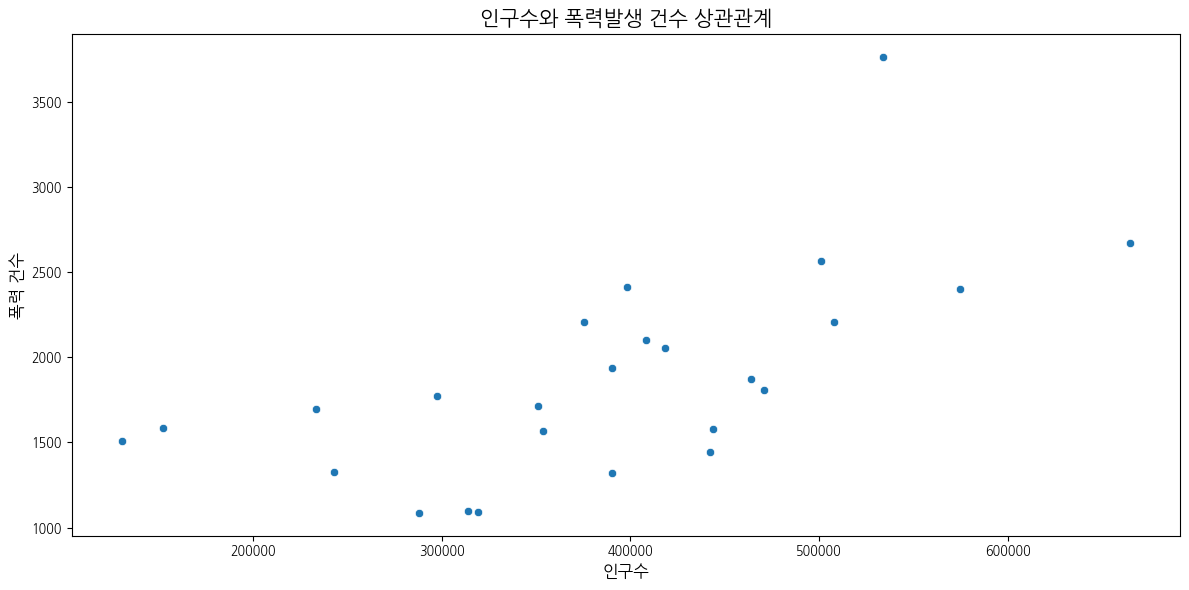

In [120]:
# 각 구의 면적 대비 범죄 건수를 비교하여 범죄 밀도를 계산하였는데 범죄 밀도가 높을 수록, CCTV 수량이 많음. 따라서 범죄율이 줄어들 것이다.

plt.figure(figsize=(12,6))
sns.scatterplot(x="소계_전체", y="폭력발생", data=final_city_area_police_people_food_merge)
plt.title("인구수와 폭력발생 건수 상관관계", fontsize=15)
plt.xlabel("인구수", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
_=plt.xticks(fontsize=9, rotation=00)
_=plt.yticks(fontsize=9)
# plt.legend(fontsize=13)
plt.tight_layout()
# plt.savefig("./음식점 빈도수와 폭력발생 건수 상관관계.png", format="png")

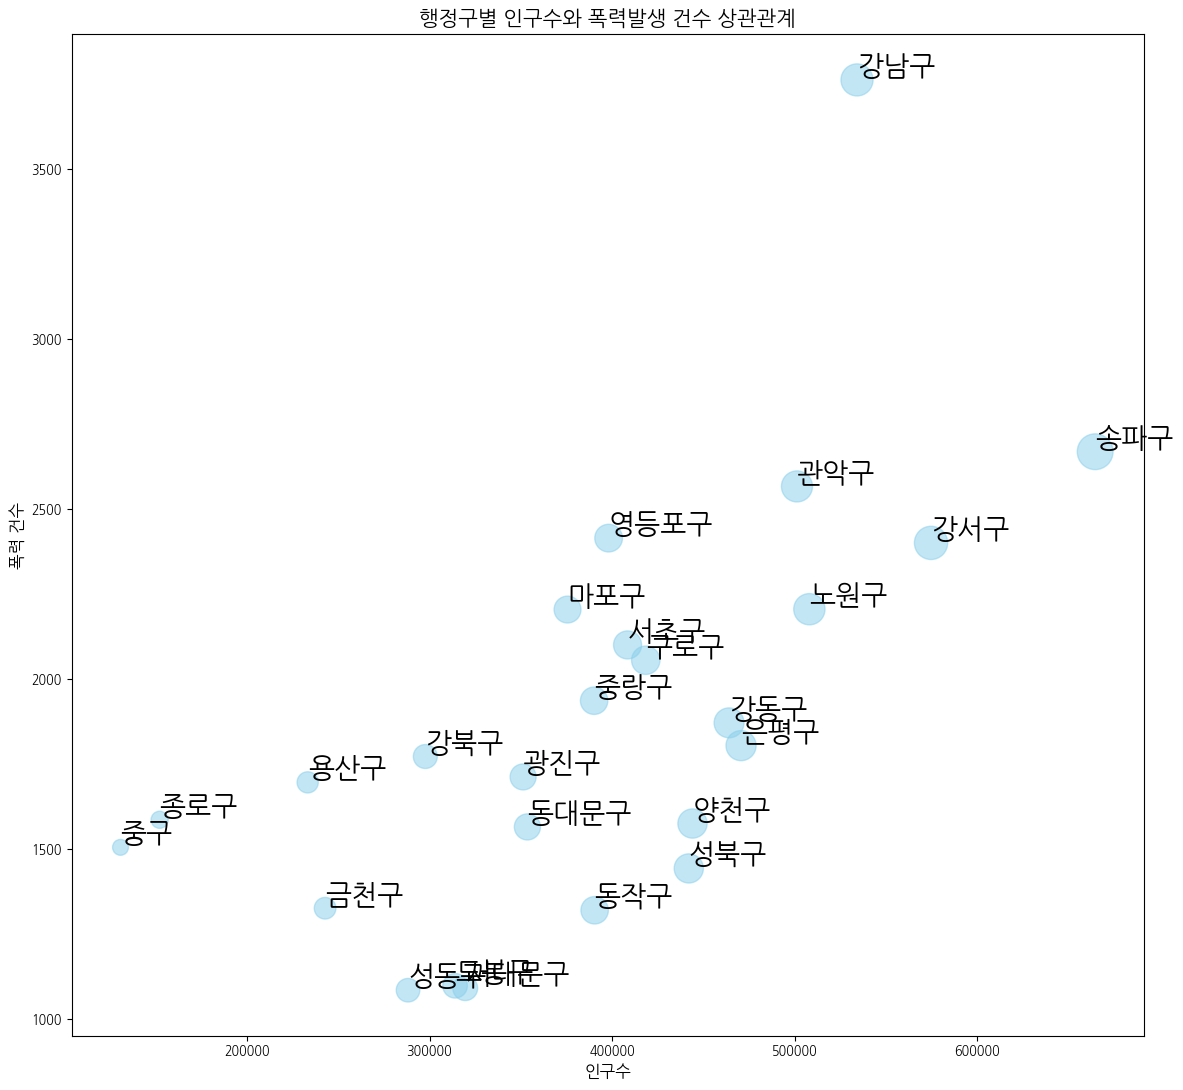

In [148]:

# plt.figure(figsize=(12,6))
plt.figure(figsize=(12,11))
scatter = plt.scatter(
    final_city_area_police_people_food_merge['소계_전체'],
    final_city_area_police_people_food_merge['폭력발생'],
    s=final_city_area_police_people_food_merge['소계_전체']/1000,  # 포인트 크기
    alpha=0.5,
    c='skyblue'
)

# 각 포인트에 구 이름 추가
texts = []
for i, txt in enumerate(final_city_area_police_people_food_merge['시군구']):
    texts.append(
        plt.text(
            final_city_area_police_people_food_merge['소계_전체'][i],
            final_city_area_police_people_food_merge['폭력발생'][i],
            txt,
            fontsize=20,  # 수정된 fontsize
            ha='left',
            va='bottom',
            color='black'
        )
    )
plt.title("행정구별 인구수와 폭력발생 건수 상관관계", fontsize=15)
plt.xlabel("인구수", fontsize=12)
plt.ylabel("폭력 건수", fontsize=12)
_=plt.xticks(fontsize=9, rotation=00)
_=plt.yticks(fontsize=9)
# plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig("./행정구별 인구수와 폭력발생 건수 상관관계.png", format="png")

In [134]:
!pip install adjustText


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


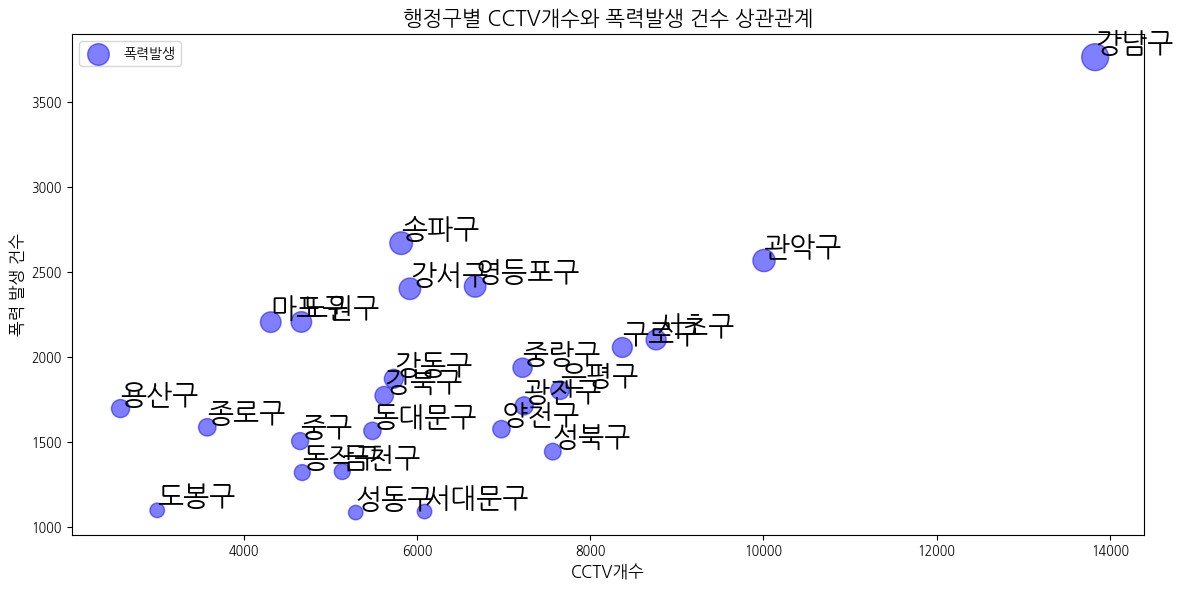

In [164]:
plt.figure(figsize=(12,6))

# Scatter plot with CCTV count on x-axis and violent crime incidents on y-axis
scatter = plt.scatter(
    final_city_area_police_people_food_merge['CCTV 수량'],
    final_city_area_police_people_food_merge['폭력발생'],
    s=final_city_area_police_people_food_merge['폭력발생']/10,  # Adjusted point size based on violent crime incidents
    alpha=0.5,
    c='blue',
    label='폭력발생'
)

# 각 포인트에 구 이름 추가
texts = []
for i, txt in enumerate(final_city_area_police_people_food_merge['시군구']):
    texts.append(
        plt.text(
            final_city_area_police_people_food_merge['CCTV 수량'][i],
            final_city_area_police_people_food_merge['폭력발생'][i],
            txt,
            fontsize=20,
            ha='left',
            va='bottom',
            color='black'
        )
    )

plt.title("행정구별 CCTV개수와 폭력발생 건수 상관관계", fontsize=15)
plt.xlabel("CCTV개수", fontsize=12)
plt.ylabel("폭력 발생 건수", fontsize=12)
plt.xticks(fontsize=9, rotation=0)
plt.yticks(fontsize=9)

# 범례 추가
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig("./행정구별 CCTV개수와 폭력발생 건수 상관관계.png", format="png")
plt.show()


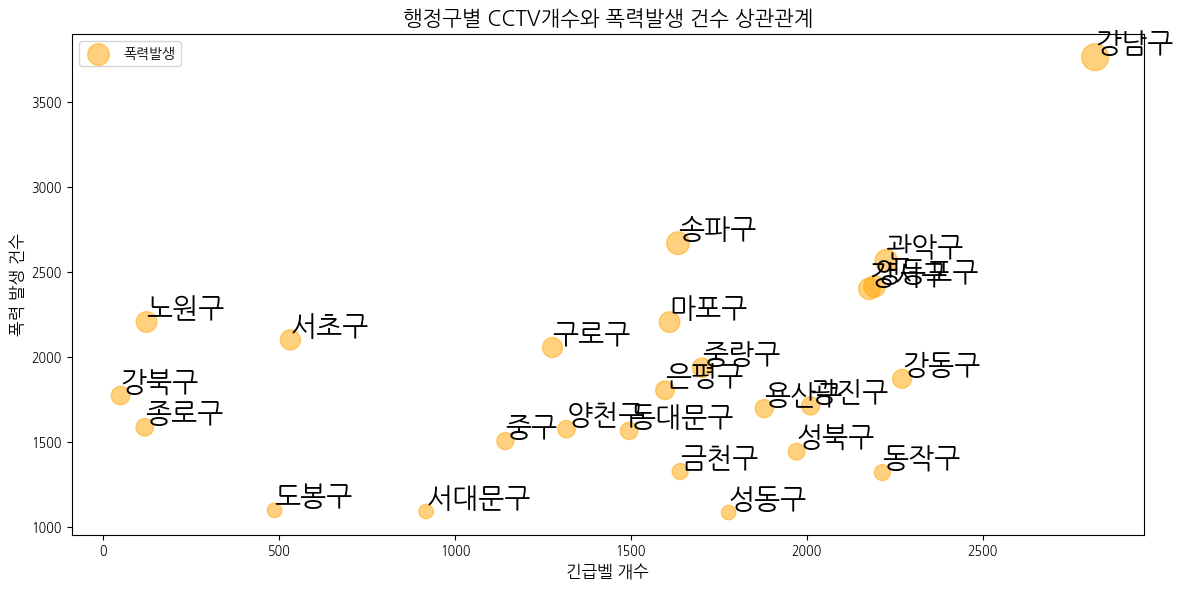

In [165]:
plt.figure(figsize=(12,6))

# Scatter plot with CCTV count on x-axis and violent crime incidents on y-axis
scatter = plt.scatter(
    final_city_area_police_people_food_merge['가로등개수'],
    final_city_area_police_people_food_merge['폭력발생'],
    s=final_city_area_police_people_food_merge['폭력발생']/10,  # Adjusted point size based on violent crime incidents
    alpha=0.5,
    c='orange',
    label='폭력발생'
)

# 각 포인트에 구 이름 추가
texts = []
for i, txt in enumerate(final_city_area_police_people_food_merge['시군구']):
    texts.append(
        plt.text(
            final_city_area_police_people_food_merge['가로등개수'][i],
            final_city_area_police_people_food_merge['폭력발생'][i],
            txt,
            fontsize=20,
            ha='left',
            va='bottom',
            color='black'
        )
    )

plt.title("행정구별 CCTV개수와 폭력발생 건수 상관관계", fontsize=15)
plt.xlabel("긴급벨 개수", fontsize=12)
plt.ylabel("폭력 발생 건수", fontsize=12)
plt.xticks(fontsize=9, rotation=0)
plt.yticks(fontsize=9)

# 범례 추가
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig("./행정구별 긴급벨 개수와 폭력발생 건수 상관관계.png", format="png")
plt.show()


In [92]:
df_infra = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.city_people`"
df_infra_df = client.query(df_infra).to_dataframe()
df_infra_df

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,시군구,소계_전체,남자_전체,여자_전체,소계_한국인,남자_한국인,여자_한국인,소계_외국인,남자_외국인,여자_외국인,세대당인구,65세이상고령자
0,도봉구,313989,152175,161814,311694,151398,160296,2295,777,1518,2.25,66998
1,마포구,375585,175006,200579,364638,171043,193595,10947,3963,6984,2.02,55914
2,강남구,534103,255363,278740,529102,253072,276030,5001,2291,2710,2.27,81715
3,구로구,418418,206632,211786,395315,194274,201041,23103,12358,10745,2.15,75890
4,종로구,152211,72980,79231,141379,68395,72984,10832,4585,6247,1.95,27958
5,강북구,297702,144037,153665,293660,142567,151093,4042,1470,2572,2.03,66307
6,강동구,464037,226975,237062,460067,225221,234846,3970,1754,2216,2.28,78340
7,서초구,408451,195168,213283,404325,193159,211166,4126,2009,2117,2.41,62347
8,동작구,390432,188080,202352,380596,184030,196566,9836,4050,5786,2.05,68231
9,성북구,441984,211246,230738,430397,206961,223436,11587,4285,7302,2.18,77475


In [22]:
df_crime = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.Crime_Data`"
df_crime_df = client.query(df_crime).to_dataframe()
df_crime_df

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,자치구별_1_,자치구별_2_,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간_강제추행발생,강간_강제추행검거,절도발생,절도검거,폭력발생,폭력검거
0,합계,광진구,3619,2498,6,5,-,-,230,174,1670,831,1713,1488
1,합계,도봉구,2141,1569,3,3,-,-,70,54,969,546,1099,966
2,합계,성북구,2749,2125,3,3,1,1,158,129,1143,715,1444,1277
3,합계,노원구,3896,2641,3,3,3,1,180,151,1504,729,2206,1757
4,합계,마포구,4096,2814,2,2,2,1,436,368,1451,653,2205,1790
5,합계,성동구,2194,1597,2,2,2,2,125,97,979,538,1086,958
6,합계,동대문구,3253,2231,4,4,2,2,125,106,1556,823,1566,1296
7,합계,중랑구,3599,2671,2,2,2,2,150,121,1508,882,1937,1664
8,합계,양천구,3169,2130,2,2,3,3,114,92,1474,781,1576,1252
9,합계,금천구,2577,1887,2,1,3,3,127,87,1118,662,1327,1134


In [23]:
df_population = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.city_people`"
df_population_df = client.query(df_population).to_dataframe()
df_population_df

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,시군구,소계_전체,남자_전체,여자_전체,소계_한국인,남자_한국인,여자_한국인,소계_외국인,남자_외국인,여자_외국인,세대당인구,65세이상고령자
0,도봉구,313989,152175,161814,311694,151398,160296,2295,777,1518,2.25,66998
1,마포구,375585,175006,200579,364638,171043,193595,10947,3963,6984,2.02,55914
2,강남구,534103,255363,278740,529102,253072,276030,5001,2291,2710,2.27,81715
3,구로구,418418,206632,211786,395315,194274,201041,23103,12358,10745,2.15,75890
4,종로구,152211,72980,79231,141379,68395,72984,10832,4585,6247,1.95,27958
5,강북구,297702,144037,153665,293660,142567,151093,4042,1470,2572,2.03,66307
6,강동구,464037,226975,237062,460067,225221,234846,3970,1754,2216,2.28,78340
7,서초구,408451,195168,213283,404325,193159,211166,4126,2009,2117,2.41,62347
8,동작구,390432,188080,202352,380596,184030,196566,9836,4050,5786,2.05,68231
9,성북구,441984,211246,230738,430397,206961,223436,11587,4285,7302,2.18,77475


In [132]:
merged_data = pd.merge(
    left=df_infra_df, 
    right= df_crime_df, 
    how="left",
    left_on='시군구',
    right_on='자치구별_2_')
merged_data

,시군구,소계_전체,남자_전체,여자_전체,소계_한국인,남자_한국인,여자_한국인,소계_외국인,남자_외국인,여자_외국인,...,살인발생,살인검거,강도발생,강도검거,강간_강제추행발생,강간_강제추행검거,절도발생,절도검거,폭력발생,폭력검거
0,도봉구,313989,152175,161814,311694,151398,160296,2295,777,1518,...,3,3,-,-,70,54,969,546,1099,966
1,마포구,375585,175006,200579,364638,171043,193595,10947,3963,6984,...,2,2,2,1,436,368,1451,653,2205,1790
2,강남구,534103,255363,278740,529102,253072,276030,5001,2291,2710,...,12,10,11,10,667,534,2495,1207,3762,3259
3,구로구,418418,206632,211786,395315,194274,201041,23103,12358,10745,...,11,11,8,9,217,145,1565,841,2056,1726
4,종로구,152211,72980,79231,141379,68395,72984,10832,4585,6247,...,2,3,8,8,228,988,1313,932,1587,1353
5,강북구,297702,144037,153665,293660,142567,151093,4042,1470,2572,...,5,4,5,6,177,147,872,589,1773,1597
6,강동구,464037,226975,237062,460067,225221,234846,3970,1754,2216,...,5,6,5,5,157,134,1672,900,1872,1599
7,서초구,408451,195168,213283,404325,193159,211166,4126,2009,2117,...,3,2,3,3,431,328,1921,1024,2101,1741
8,동작구,390432,188080,202352,380596,184030,196566,9836,4050,5786,...,2,3,5,5,212,107,1195,588,1321,1038
9,성북구,441984,211246,230738,430397,206961,223436,11587,4285,7302,...,3,3,1,1,158,129,1143,715,1444,1277


In [133]:
merged_data = pd.merge(
    left=df_crime_df, 
    right= df_population_df, 
    how="left",
    left_on='자치구별_2_',
    right_on='시군구')
merged_data

,자치구별_1_,자치구별_2_,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간_강제추행발생,강간_강제추행검거,...,남자_전체,여자_전체,소계_한국인,남자_한국인,여자_한국인,소계_외국인,남자_외국인,여자_외국인,세대당인구,65세이상고령자
0,합계,광진구,3619,2498,6,5,-,-,230,174,...,168197,183055,337416,162541,174875,13836,5656,8180,1.99,54071
1,합계,도봉구,2141,1569,3,3,-,-,70,54,...,152175,161814,311694,151398,160296,2295,777,1518,2.25,66998
2,합계,성북구,2749,2125,3,3,1,1,158,129,...,211246,230738,430397,206961,223436,11587,4285,7302,2.18,77475
3,합계,노원구,3896,2641,3,3,3,1,180,151,...,244010,264004,503734,242145,261589,4280,1865,2415,2.32,92040
4,합계,마포구,4096,2814,2,2,2,1,436,368,...,175006,200579,364638,171043,193595,10947,3963,6984,2.02,55914
5,합계,성동구,2194,1597,2,2,2,2,125,97,...,139691,148543,281000,136633,144367,7234,3058,4176,2.11,47720
6,합계,동대문구,3253,2231,4,4,2,2,125,106,...,171903,181698,336644,165755,170889,16957,6148,10809,1.98,64468
7,합계,중랑구,3599,2671,2,2,2,2,150,121,...,191422,198718,385318,189537,195781,4822,1885,2937,2.06,74920
8,합계,양천구,3169,2130,2,2,3,3,114,92,...,216975,227035,440881,215682,225199,3129,1293,1836,2.43,72393
9,합계,금천구,2577,1887,2,1,3,3,127,87,...,122775,120043,229642,115786,113856,13176,6989,6187,1.92,42928


In [134]:
merged_data["천명당 범죄 건수"] = (merged_data["발생합계"]/merged_data["소계_전체"])*1000
merged_data = merged_data[0:24]

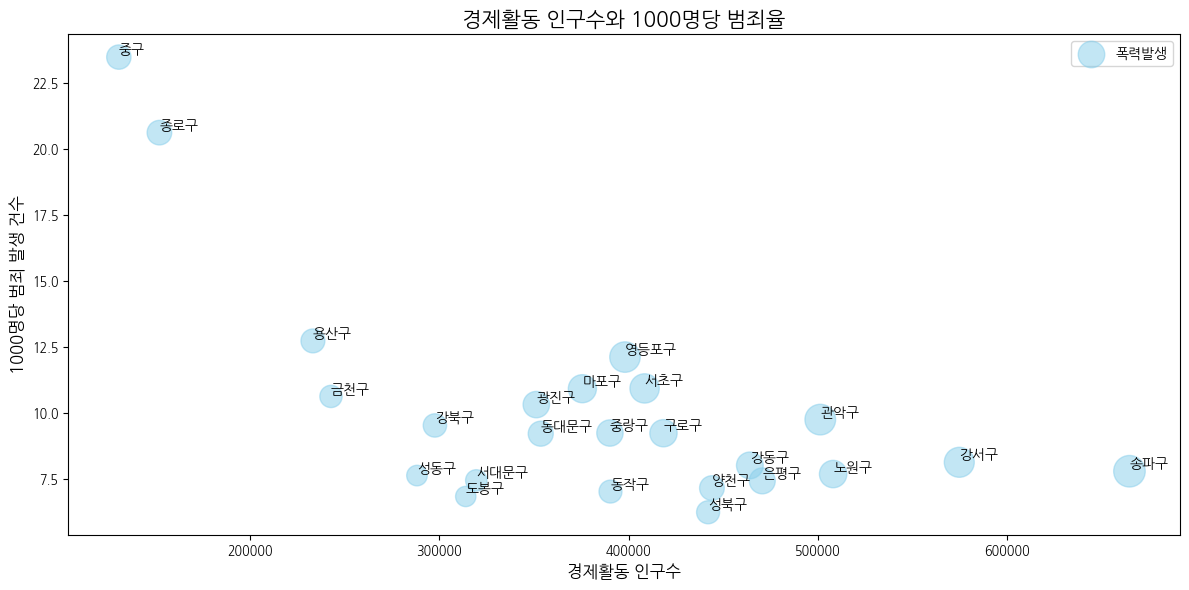

In [135]:
plt.figure(figsize=(12,6))

# Scatter plot with CCTV count on x-axis and violent crime incidents on y-axis
scatter = plt.scatter(
    merged_data["소계_전체"],
    merged_data["천명당 범죄 건수"],
    s=merged_data['발생합계']/10,  # Adjusted point size based on violent crime incidents
    alpha=0.5,
    c='skyblue',
    label='폭력발생'
)

# 각 포인트에 구 이름 추가
texts = []
for i, txt in enumerate(merged_data['시군구']):
    texts.append(
        plt.text(
            merged_data["소계_전체"][i],
            merged_data["천명당 범죄 건수"][i],
            txt,
            fontsize=10,
            ha='left',
            va='bottom',
            color='black'
        )
    )

plt.title("경제활동 인구수와 1000명당 범죄율", fontsize=15)
plt.xlabel("경제활동 인구수", fontsize=12)
plt.ylabel("1000명당 범죄 발생 건수", fontsize=12)
plt.xticks(fontsize=9, rotation=0)
plt.yticks(fontsize=9)

# 범례 추가
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig("./경제활동 인구수와 1000명당 범죄율.png", format="png")
plt.show()


C:\Users\ektjw\AppData\Local\Temp\ipykernel_29104\2333375801.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_data['시군구'], rotation=90)


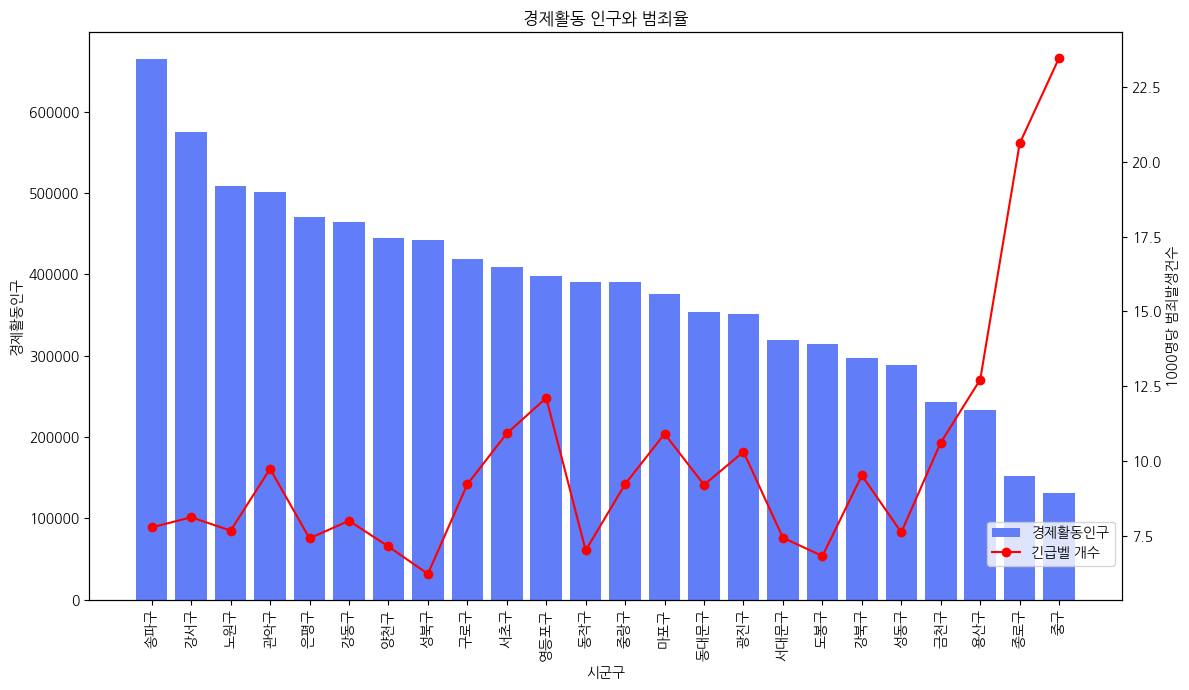

In [136]:
# 막대 그래프 및 선 그래프 그리기
merged_data = merged_data.sort_values(by=["소계_전체"], ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 7))

# 폭력발생 막대 그래프 (왼쪽 y축)
ax1.bar(merged_data['시군구'], merged_data['소계_전체'], color='#617DF8',  label='경제활동인구')
# ax1.bar(final_city_area_police_people_merge['시군구'],final_city_area_police_people_merge['번호'], color='#3D85C1', alpha=0.7, label='경찰서 수')
ax1.set_xlabel('시군구')
ax1.set_ylabel('경제활동인구', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(merged_data['시군구'], rotation=90)

# 오른쪽 y축
ax2 = ax1.twinx()
ax2.plot(merged_data['시군구'], merged_data["천명당 범죄 건수"], color='red', marker='o', label='긴급벨 개수')
ax2.set_ylabel('1000명당 범죄발생건수', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# 범례 추가
fig.legend(loc="upper right", bbox_to_anchor=(1,0.15), bbox_transform=ax1.transAxes)

# 제목 추가
plt.title('경제활동 인구와 범죄율')

# 그래프 저장 혹은 출력
plt.tight_layout()
plt.savefig("./경제활동 인구와 범죄율.png", format="png")

###  Heatmap

C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
C:\Users\ektjw\AppData\Local\Temp\ipykernel_5160\4178405849.py:9: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.savefig("./heatmap.png", format="png")
C:\Users\ektjw\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


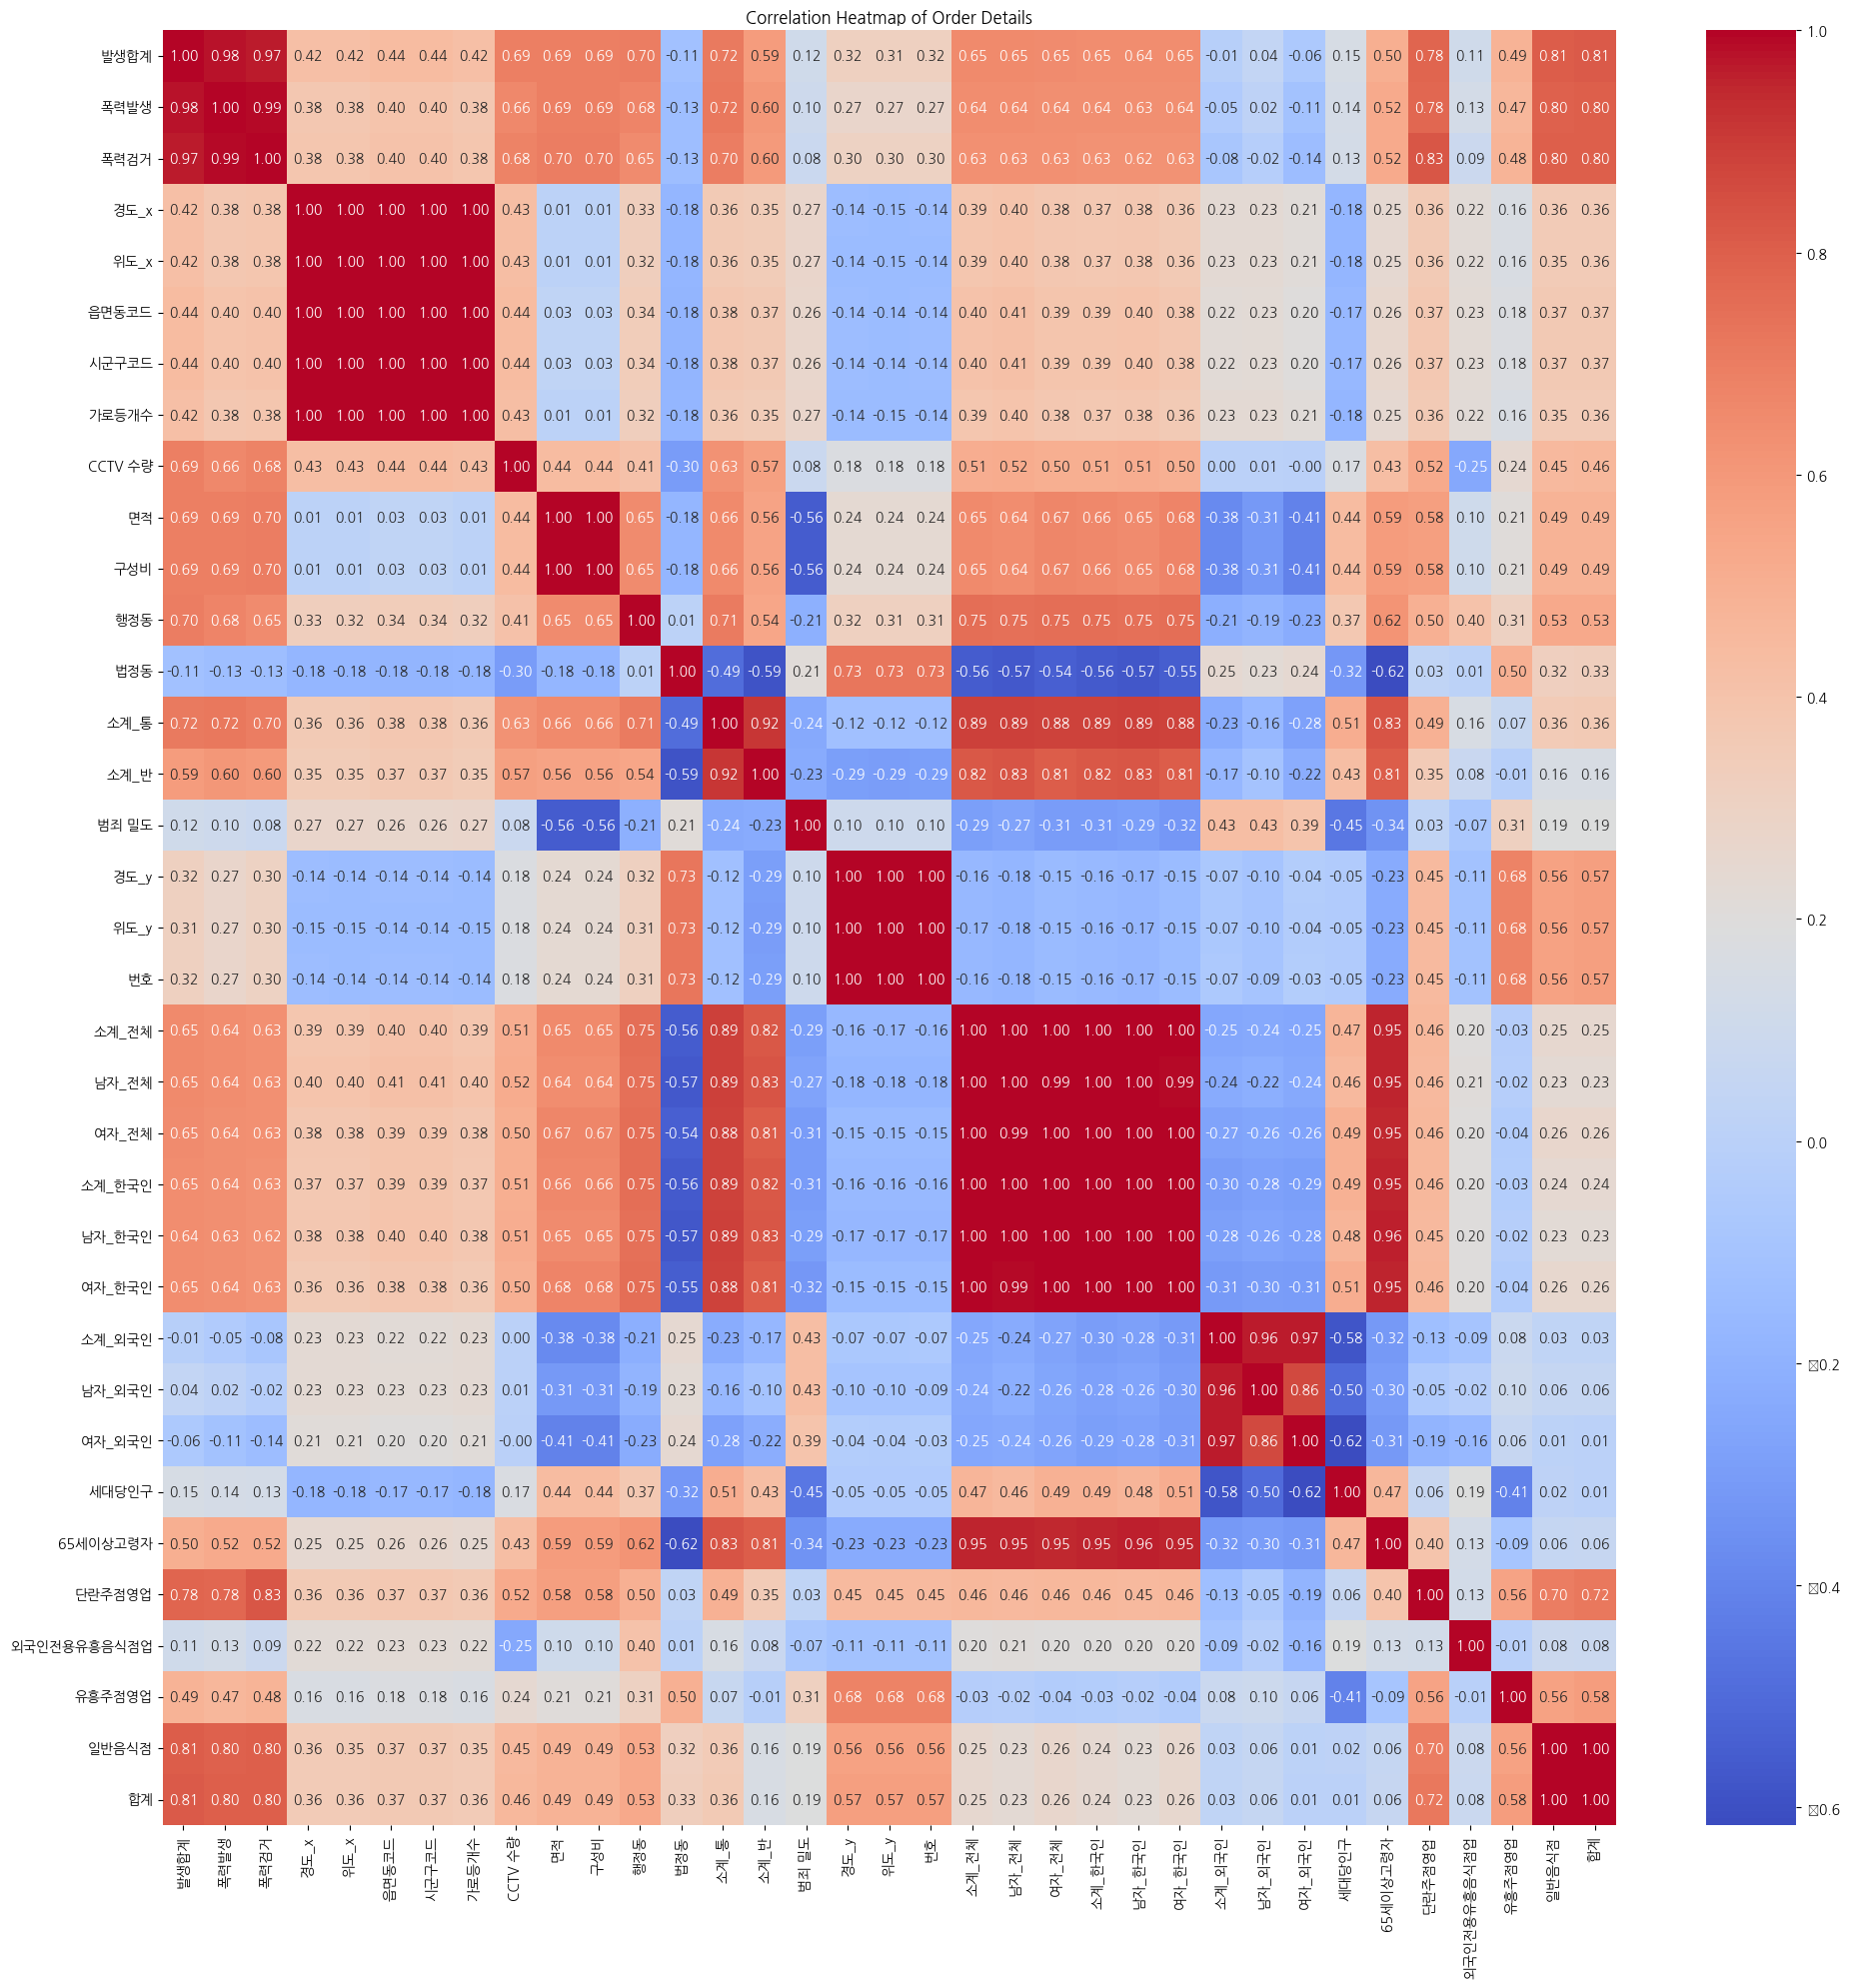

In [247]:
# 상관 행렬 계산 (수치형 데이터만 사용)
numeric_data = final_city_area_police_people_food_merge.select_dtypes(include=['float64', 'int64'])

# 히트맵 그리기
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Order Details')
plt.tight_layout()
plt.savefig("./heatmap.png", format="png")